In [1]:
import glob
import re
import pandas as pd

In [2]:
def load_hogar_ccaa_data(
    path_pattern: str = '../../datamarts/picotaData/hogarCCAA*.tsv',
    sort_by_ccaa: bool = True,
    ccaa_column_name: str = 'ccaa'
) -> pd.DataFrame:
    """
    Lee todos los ficheros TSV de hogares por CCAA, añade una columna con el código
    de CCAA extraído del nombre de fichero, concatena todo en un único DataFrame y
    opcionalmente ordena por CCAA.

    Parameters
    ----------
    path_pattern : str
        Patrón glob para localizar los archivos (por defecto '../../datamarts/picotaData/hogarCCAA*.tsv').
    sort_by_ccaa : bool
        Si True, ordena el DataFrame resultante por la columna de CCAA.
    ccaa_column_name : str
        Nombre de la columna donde se almacenará el código de CCAA.

    Returns
    -------
    pd.DataFrame
        DataFrame con todos los datos concatenados y la columna de CCAA.
    """
    files = glob.glob(path_pattern)
    dfs = []

    for fp in files:
        m = re.search(r'hogarCCAA(\d+)\.tsv$', fp)
        if not m:
            continue
        code = m.group(1).zfill(2)  # si quieres siempre dos dígitos, ojo

        df = pd.read_csv(fp, sep='\t')
        df[ccaa_column_name] = code
        dfs.append(df)

    if not dfs:
        raise FileNotFoundError(f"No se encontraron archivos con patrón {path_pattern}")

    big_df = pd.concat(dfs, ignore_index=True)

    if sort_by_ccaa:
        big_df.sort_values(ccaa_column_name, inplace=True)

    return big_df



In [3]:
df = load_hogar_ccaa_data()
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
df.head()

timestamp  capitalProvincia  tamanoMunicipio  densidad  \
0      2006-01-01T00:00:00                 0                1         1   
26322  2017-01-01T00:00:00                 0                4         2   
26323  2017-01-01T00:00:00                 0                4         1   
26324  2017-01-01T00:00:00                 0                3         1   
26325  2017-01-01T00:00:00                 1                5         3   

       superficie  tipoCasa  aguaCaliente  calefaccion  zonaResidencial  \
0            80.0         1             1            0                3   
26322        63.0         2             1            0                6   
26323       300.0         3             1            0                6   
26324        65.0         1             1            0                4   
26325        94.0         2             1            0                5   

       regimenTenencia  comidasTotales  miembros:estudiantes  \
0                    4            84.0                     0   
26322                6            56.0                     0   
26323                5            78.0                     0   
26324                6            60.0                     0   
26325                4            24.0                     0   

       miembros:noEstudiantes  miembros:ocupados  miembros:noOcupados  \
0                           3                0.0                    3   
26322                       2                0.0                    2   
26323                       3                2.0                    1   
26324                       2                0.0                    2   
26325                       1                1.0                    0   

       miembros:activos  miembros:noActivos  miembros:ancianos:masculinos  \
0                   1.0                   2                             1   
26322               0.0                   2                             1   
26323               2.0                   1                             0   
26324               0.0                   2                             1   
26325               1.0                   0                             0   

       miembros:ancianos:femeninos  miembros:adultos:masculinos  \
0                                1                            0   
26322                            1                            0   
26323                            0                            1   
26324                            1                            0   
26325                            0                            1   

       miembros:adultos:femeninos  miembros:niños:femeninos  \
0                               0                         1   
26322                           0                         0   
26323                           1                         0   
26324                           0                         0   
26325                           0                         0   

       miembros:niños:masculinos  miembros:conIngresos:masculinos  \
0                              0                                1   
26322                          0                                1   
26323                          1                                1   
26324                          0                                1   
26325                          0                                1   

       miembros:conIngresos:femeninos  miembros:sinIngresos:masculinos  \
0                                   1                                0   
26322                               1                                0   
26323                               1                                1   
26324                               1                                0   
26325                               0                                0   

       miembros:sinIngresos:femeninos  edadSp  espanolSp  educacionSuperiorSp  \
0                                   1      67          1                    0   
26322                   

Convertimos en dummies las variables categoricas

In [4]:
df = pd.get_dummies(df, columns=['ccaa', 'fuentePrincipalIngresos'], prefix=['ccaa', 'fuentePrincipalIngresos'])

df.rename(columns=lambda x: re.sub(r'^ccaa_(\d+)$', r'ccaa_\1', x), inplace=True)
df.rename(columns=lambda x: re.sub(r'^fuentePrincipalIngresos_(\d+)$', r'fuentePrincipalIngresos_\1', x), inplace=True)


In [5]:
df['miembros:total'] = df['miembros:activos'] + df['miembros:noActivos']
df['miembros:niños'] = df['miembros:niños:masculinos'] + df['miembros:niños:femeninos']
df["miembros:adultos"] = df['miembros:adultos:masculinos'] + df['miembros:adultos:femeninos']
df["miembros:ancianos"] = df['miembros:ancianos:masculinos'] + df['miembros:ancianos:femeninos']

In [6]:
df.head(
)

timestamp  capitalProvincia  tamanoMunicipio  densidad  \
0      2006-01-01T00:00:00                 0                1         1   
26322  2017-01-01T00:00:00                 0                4         2   
26323  2017-01-01T00:00:00                 0                4         1   
26324  2017-01-01T00:00:00                 0                3         1   
26325  2017-01-01T00:00:00                 1                5         3   

       superficie  tipoCasa  aguaCaliente  calefaccion  zonaResidencial  \
0            80.0         1             1            0                3   
26322        63.0         2             1            0                6   
26323       300.0         3             1            0                6   
26324        65.0         1             1            0                4   
26325        94.0         2             1            0                5   

       regimenTenencia  comidasTotales  miembros:estudiantes  \
0                    4            84.0                     0   
26322                6            56.0                     0   
26323                5            78.0                     0   
26324                6            60.0                     0   
26325                4            24.0                     0   

       miembros:noEstudiantes  miembros:ocupados  miembros:noOcupados  \
0                           3                0.0                    3   
26322                       2                0.0                    2   
26323                       3                2.0                    1   
26324                       2                0.0                    2   
26325                       1                1.0                    0   

       miembros:activos  miembros:noActivos  miembros:ancianos:masculinos  \
0                   1.0                   2                             1   
26322               0.0                   2                             1   
26323               2.0                   1                             0   
26324               0.0                   2                             1   
26325               1.0                   0                             0   

       miembros:ancianos:femeninos  miembros:adultos:masculinos  \
0                                1                            0   
26322                            1                            0   
26323                            0                            1   
26324                            1                            0   
26325                            0                            1   

       miembros:adultos:femeninos  miembros:niños:femeninos  \
0                               0                         1   
26322                           0                         0   
26323                           1                         0   
26324                           0                         0   
26325                           0                         0   

       miembros:niños:masculinos  miembros:conIngresos:masculinos  \
0                              0                                1   
26322                          0                                1   
26323                          1                                1   
26324                          0                                1   
26325                          0                                1   

       miembros:conIngresos:femeninos  miembros:sinIngresos:masculinos  \
0                                   1                                0   
26322                               1                                0   
26323                               1                                1   
26324                               1                                0   
26325                               0                                0   

       miembros:sinIngresos:femeninos  edadSp  espanolSp  educacionSuperiorSp  \
0                                   1      67          1                    0   
26322                   

In [7]:
output_columns = [col for col in df.columns if col.startswith("gastoMonetario:")]


## Analísis de sensibilidad no lineal por código

### 🗂 Categorías por código (Super_Categoría)

| Código | Categoría                                                                                           |
|--------|-----------------------------------------------------------------------------------------------------|
| 01.1   | PRODUCTOS ALIMENTICIOS                                                                              |
| 01.2   | BEBIDAS NO ALCOHÓLICAS                                                                              |
| 02.1   | BEBIDAS ALCOHÓLICAS                                                                                 |
| 02.2   | TABACO                                                                                              |
| 03.1   | ARTÍCULOS DE VESTIR                                                                                 |
| 03.2   | CALZADO                                                                                             |
| 04.1   | ALQUILERES REALES DE LA VIVIENDA                                                                    |
| 04.2   | ALQUILERES IMPUTADOS DE LA VIVIENDA                                                                 |
| 04.3   | GASTOS CORRIENTES DE MANTENIMIENTO Y REPARACIÓN DE LA VIVIENDA                                     |
| 04.4   | SUMINISTRO DE AGUA Y OTROS SERVICIOS RELACIONADOS CON LA VIVIENDA                                  |
| 04.5   | ELECTRICIDAD, GAS Y OTROS COMBUSTIBLES                                                              |
| 05.1   | MUEBLES, ARTÍCULOS DE AMUEBLAMIENTO, ALFOMBRAS Y OTROS REVESTIMIENTOS PARA SUELOS                  |
| 05.2   | ARTÍCULOS TEXTILES PARA EL HOGAR                                                                    |
| 05.3   | APARATOS DE CALEFACCIÓN Y DE COCINA, FRIGORÍFICOS, LAVADORAS Y OTROS GRANDES ELECTRODOMÉSTICOS     |
| 05.4   | CRISTALERÍA, VAJILLA, CUBERTERÍA Y OTROS UTENSILIOS DEL HOGAR                                       |
| 05.5   | HERRAMIENTAS PARA CASA Y JARDÍN                                                                     |
| 05.6   | BIENES Y SERVICIOS PARA EL MANTENIMIENTO CORRIENTE DEL HOGAR                                       |
| 06.1   | PRODUCTOS FARMACÉUTICOS; APARATOS Y MATERIAL TERAPÉUTICO                                            |
| 06.2   | SERVICIOS MÉDICOS Y PARAMÉDICOS AMBULATORIOS                                                        |
| 06.3   | SERVICIOS HOSPITALARIOS                                                                             |
| 07.1   | COMPRA DE VEHÍCULOS                                                                                 |
| 07.2   | UTILIZACIÓN DE VEHÍCULOS PERSONALES                                                                 |
| 07.3   | SERVICIOS DE TRANSPORTE                                                                             |
| 08.1   | SERVICIOS POSTALES                                                                                  |
| 08.2   | EQUIPOS DE TELÉFONO Y FAX                                                                           |
| 08.3   | SERVICIOS DE TELÉFONO Y FAX                                                                         |
| 09.1   | EQUIPOS Y ACCESORIOS AUDIOVISUALES, FOTOGRÁFICOS Y DE PROCESAMIENTO DE INFORMACIÓN                 |
| 09.2   | OTROS BIENES DURADEROS PARA EL OCIO Y LA CULTURA                                                   |
| 09.3   | OTROS ARTÍCULOS Y EQUIPOS PARA EL OCIO, JARDINERÍA Y MASCOTAS                                      |
| 09.4   | SERVICIOS RECREATIVOS Y CULTURALES                                                                  |
| 09.5   | PRENSA, LIBRERÍA Y PAPELERÍA                                                                        |
| 09.6   | PAQUETES TURÍSTICOS                                                                                 |
| 10.1   | EDUCACIÓN INFANTIL Y PRIMARIA (NIVELES 0 Y 1 CNED-P-2014)                                           |
| 10.2   | EDUCACIÓN SECUNDARIA Y EDUCACIÓN POSTSECUNDARIA NO SUPERIOR (NIVELES 2, 3 Y 4 CNED-P-2014)         |
| 10.3   | EDUCACIÓN SUPERIOR (NIVELES 5, 6, 7 y 8 CNED-P-2014)                                                |
| 10.4   | EDUCACIÓN NO FORMAL (NIVEL 9 CNED-P-2014)                                                           |
| 11.1   | RESTAURACIÓN                                                                                        |
| 11.2   | SERVICIOS DE ALOJAMIENTO                                                                            |
| 12.1   | CUIDADOS PERSONALES                                                                                 |
| 12.3   | EFECTOS PERSONALES NO DECLARADOS ANTERIORMENTE                                                     |
| 12.4   | PROTECCIÓN SOCIAL                                                                                   |
| 12.5   | SERVICIOS DE SEGUROS                                                                                |
| 12.6   | SERVICIOS FINANCIEROS NO DECLARADOS EN OTRA PARTE                                                  |
| 12.7   | OTROS SERVICIOS NO DECLARADOS ANTERIORMENTE                                                        |
| 12.8   | REMESAS                                                                                             |


---


## MLP

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [9]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def train_mlp_per_category(df, output_columns, hidden_layer_sizes=(128, 64, 32), max_iter=500, top_n=10):
    r2_results = []
    mse_results = []
    all_importances = []

    excluded = output_columns + ["timestamp"]
    input_features = [col for col in df.select_dtypes(include="number").columns if col not in excluded]

    for target in output_columns:
        print(f"\n🔧 Training MLP for {target}...")

        df_clean = df.dropna(subset=[target] + input_features)
        if df_clean.shape[0] < len(input_features) + 10:
            print("❌ Not enough data. Skipping.")
            continue

        X = df_clean[input_features]
        y = df_clean[target]

        # Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Normalize
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # MLP model
        mlp = MLPRegressor(
            hidden_layer_sizes=hidden_layer_sizes,
            activation='relu',
            solver='adam',
            early_stopping=True,
            n_iter_no_change=10,
            validation_fraction=0.1,
            max_iter=max_iter,
            random_state=42
        )
        mlp.fit(X_train, y_train)

        # Predict & evaluate
        y_pred = mlp.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print(f"✅ R² for {target}: {r2:.4f}, MSE: {mse:.4f}")

        # Permutation importance
        print("🔍 Calculating permutation importances...")
        result = permutation_importance(mlp, X_test, y_test, n_repeats=5, random_state=42, n_jobs=1)
        importances_df = pd.DataFrame({
            "Variable": df_clean[input_features].columns,
            "Importance": result.importances_mean,
            "Target": target
        }).sort_values(by="Importance", ascending=False)

        # Show top variables
        print(f"📊 Top {top_n} variables by importance for {target}:")
        print(importances_df.head(top_n).to_string(index=False))

        # Save results
        r2_results.append({"Target": target, "R2": r2})
        mse_results.append({"Target": target, "MSE": mse})
        all_importances.append(importances_df)

    r2_df = pd.DataFrame(r2_results).sort_values(by="R2", ascending=False)
    mse_df = pd.DataFrame(mse_results).sort_values(by="MSE", ascending=False)
    importances_df = pd.concat(all_importances, ignore_index=True)

    return r2_df, importances_df, mse_df


In [10]:
mlp_r2_df, mlp_importances_df, mse_df = train_mlp_per_category(df, output_columns)



🔧 Training MLP for gastoMonetario:productosAlimenticios11...
✅ R² for gastoMonetario:productosAlimenticios11: 0.4507, MSE: 3300745.5469
🔍 Calculating permutation importances...
📊 Top 10 variables by importance for gastoMonetario:productosAlimenticios11:
        Variable  Importance                                 Target
   ingresosNetos    0.454563 gastoMonetario:productosAlimenticios11
      tasaAhorro    0.382011 gastoMonetario:productosAlimenticios11
  comidasTotales    0.277613 gastoMonetario:productosAlimenticios11
             ipc    0.155348 gastoMonetario:productosAlimenticios11
          edadSp    0.039200 gastoMonetario:productosAlimenticios11
  miembros:total    0.015953 gastoMonetario:productosAlimenticios11
       inflacion    0.015517 gastoMonetario:productosAlimenticios11
  miembros:niños    0.006636 gastoMonetario:productosAlimenticios11
temperaturaMedia    0.006530 gastoMonetario:productosAlimenticios11
     tipoInteres    0.006265 gastoMonetario:productosAlimenticios

In [11]:
mlp_importances_df.head(5)

Variable  Importance                                  Target
0   ingresosNetos    0.454563  gastoMonetario:productosAlimenticios11
1      tasaAhorro    0.382011  gastoMonetario:productosAlimenticios11
2  comidasTotales    0.277613  gastoMonetario:productosAlimenticios11
3             ipc    0.155348  gastoMonetario:productosAlimenticios11
4          edadSp    0.039200  gastoMonetario:productosAlimenticios11

### Analísis del r2 de nuestros modelos

In [12]:
mlp_r2_df

Target         R2
6       gastoMonetario:alquileresRealesDeLaVivienda41   0.787167
19                 gastoMonetario:compraDeVehiculos71   0.465714
0              gastoMonetario:productosAlimenticios11   0.450690
35                     gastoMonetario:restauracion111   0.388108
8                   gastoMonetario:suministroDeAgua44   0.382765
9   gastoMonetario:electricidadGasOtrosCombustibles45   0.374749
31       gastoMonetario:educacionInfantilYPrimaria101   0.360486
32  gastoMonetario:educacionSecundariaYPostsecunda...   0.302376
24              gastoMonetario:serviciosTelefonoFax83   0.301278
15        gastoMonetario:bienesServiciosParaElHogar56   0.292630
20          gastoMonetario:usoDeVehiculosPersonales72   0.247048
40                          gastoMonetario:seguros125   0.243112
30                gastoMonetario:paquetesTuristicos96   0.215971
4                  gastoMonetario:articulosDeVestir31   0.208788
33                gastoMonetario:educacionSuperior103   0.208494
37               gastoMonetario:cuidadosPersonales121   0.202017
5                            gastoMonetario:calzado32   0.159423
21             gastoMonetario:serviciosDeTransporte73   0.138691
41             gastoMonetario:serviciosFinancieros126   0.137029
1               gastoMonetario:bebidasNoAlcoholicas12   0.128913
16            gastoMonetario:productosFarmaceuticos61   0.116863
29                  gastoMonetario:prensaYPapeleria95   0.104493
34                gastoMonetario:educacionNoFormal104   0.098130
17      gastoMonetario:serviciosMedicosAmbulatorios62   0.091560
10             gastoMonetario:mueblesRevestimientos51   0.091455
3                             gastoMonetario:tabaco22   0.090467
2                 gastoMonetario:bebidasAlcoholicas21   0.081902
23                gastoMonetario:equiposTelefonoFax82   0.081824
22                 gastoMonetario:serviciosPostales81   0.077390
7          gastoMonetario:mantenimientoDeLaVivienda43   0.076372
18            gastoMonetario:serviciosHospitalarios63   0.071355
11               gastoMonetario:textilesParaElHogar52   0.061671
39                 gastoMonetario:proteccionSocial124   0.060780
25           gastoMonetario:audiovisualesTecnologia91   0.060740
27           gastoMonetario:ocioJardineriaYMascotas93   0.056667
12          gastoMonetario:grandesElectrodomesticos53   0.051249
38                gastoMonetario:efectosPersonales123   0.050326
43                          gastoMonetario:remesas128   0.049611
14            gastoMonetario:herramientasCasaJardin55   0.044781
26             gastoMonetario:bienesDuraderosDeOcio92   0.031142
13                gastoMonetario:utensiliosDelHogar54  -0.528441
36                      gastoMonetario:alojamiento112  -0.730367
28   gastoMonetario:serviciosRecreativosYCulturales94  -3.648606
42                   gastoMonetario:otrosServicios127 -82.575712

In [13]:
mse_df

Target           MSE
42                   gastoMonetario:otrosServicios127  7.263409e+08
19                 gastoMonetario:compraDeVehiculos71  3.106854e+07
28   gastoMonetario:serviciosRecreativosYCulturales94  1.212310e+07
18            gastoMonetario:serviciosHospitalarios63  1.039601e+07
20          gastoMonetario:usoDeVehiculosPersonales72  7.103085e+06
35                     gastoMonetario:restauracion111  5.528138e+06
36                      gastoMonetario:alojamiento112  5.001805e+06
17      gastoMonetario:serviciosMedicosAmbulatorios62  4.579811e+06
7          gastoMonetario:mantenimientoDeLaVivienda43  3.770729e+06
0              gastoMonetario:productosAlimenticios11  3.300746e+06
4                  gastoMonetario:articulosDeVestir31  3.170980e+06
43                          gastoMonetario:remesas128  3.055181e+06
26             gastoMonetario:bienesDuraderosDeOcio92  2.237725e+06
32  gastoMonetario:educacionSecundariaYPostsecunda...  2.206310e+06
10             gastoMonetario:mueblesRevestimientos51  2.120544e+06
16            gastoMonetario:productosFarmaceuticos61  2.046019e+06
27           gastoMonetario:ocioJardineriaYMascotas93  1.579514e+06
6       gastoMonetario:alquileresRealesDeLaVivienda41  1.472651e+06
15        gastoMonetario:bienesServiciosParaElHogar56  1.383298e+06
30                gastoMonetario:paquetesTuristicos96  1.254451e+06
33                gastoMonetario:educacionSuperior103  1.188263e+06
38                gastoMonetario:efectosPersonales123  1.180444e+06
39                 gastoMonetario:proteccionSocial124  9.099874e+05
31       gastoMonetario:educacionInfantilYPrimaria101  8.205684e+05
21             gastoMonetario:serviciosDeTransporte73  7.750466e+05
3                             gastoMonetario:tabaco22  7.339153e+05
41             gastoMonetario:serviciosFinancieros126  6.901618e+05
40                          gastoMonetario:seguros125  6.240528e+05
37               gastoMonetario:cuidadosPersonales121  6.226434e+05
11               gastoMonetario:textilesParaElHogar52  5.712128e+05
13                gastoMonetario:utensiliosDelHogar54  4.397113e+05
12          gastoMonetario:grandesElectrodomesticos53  4.369271e+05
5                            gastoMonetario:calzado32  3.768883e+05
29                  gastoMonetario:prensaYPapeleria95  3.749924e+05
25           gastoMonetario:audiovisualesTecnologia91  3.553567e+05
8                   gastoMonetario:suministroDeAgua44  3.486923e+05
9   gastoMonetario:electricidadGasOtrosCombustibles45  3.151270e+05
34                gastoMonetario:educacionNoFormal104  2.388700e+05
14            gastoMonetario:herramientasCasaJardin55  2.360793e+05
2                 gastoMonetario:bebidasAlcoholicas21  2.034079e+05
24              gastoMonetario:serviciosTelefonoFax83  1.709831e+05
1               gastoMonetario:bebidasNoAlcoholicas12  9.429618e+04
23                gastoMonetario:equiposTelefonoFax82  4.673356e+04
22                 gastoMonetario:serviciosPostales81  3.444621e+04

### Importancia de las variables por categoría de gasto

In [14]:
import matplotlib.pyplot as plt

def plot_feature_importances_by_target(df, top_n=15):
    """
    Genera una gráfica de barras horizontales por cada target en el DataFrame,
    mostrando las top_n variables más importantes.

    Parámetros:
    - df: DataFrame con columnas ['feature', 'importance', 'target']
    - top_n: número de variables más importantes a mostrar (por defecto 15)
    """
    targets = df['Target'].unique()
    for target in targets:
        subset = df[df['Target'] == target].sort_values(by='Importance', ascending=False).head(top_n)
        
        plt.figure(figsize=(10, 6))
        plt.barh(subset['Variable'], subset['Importance'])
        plt.xlabel('Importancia')
        plt.title(f'Importancia de variables para: {target}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()


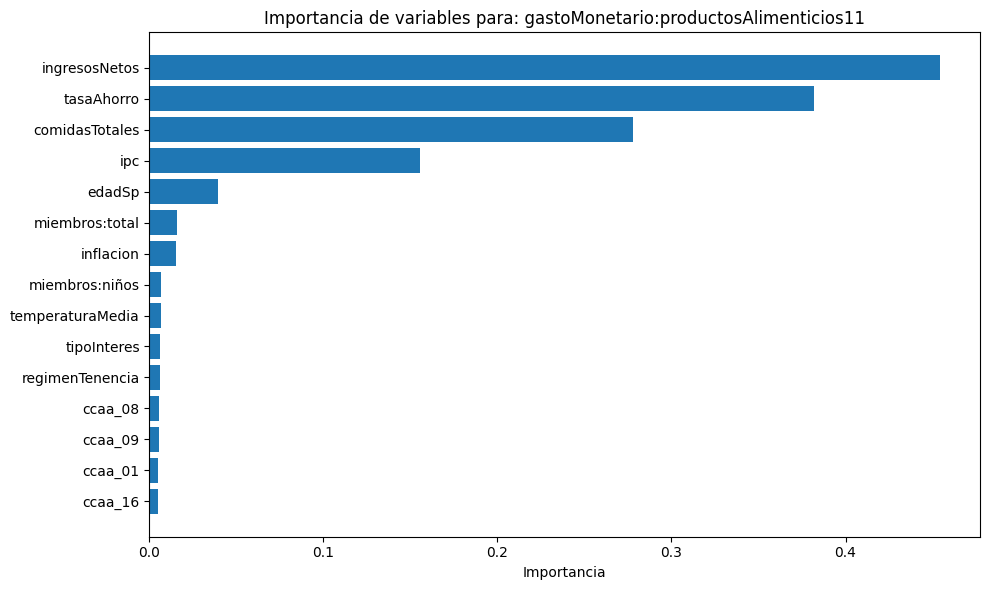

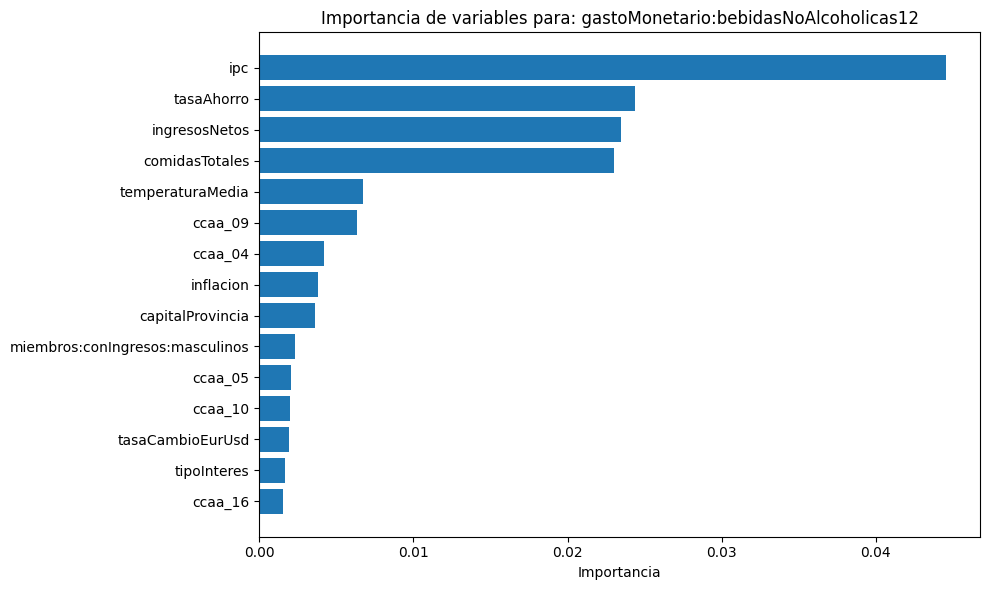

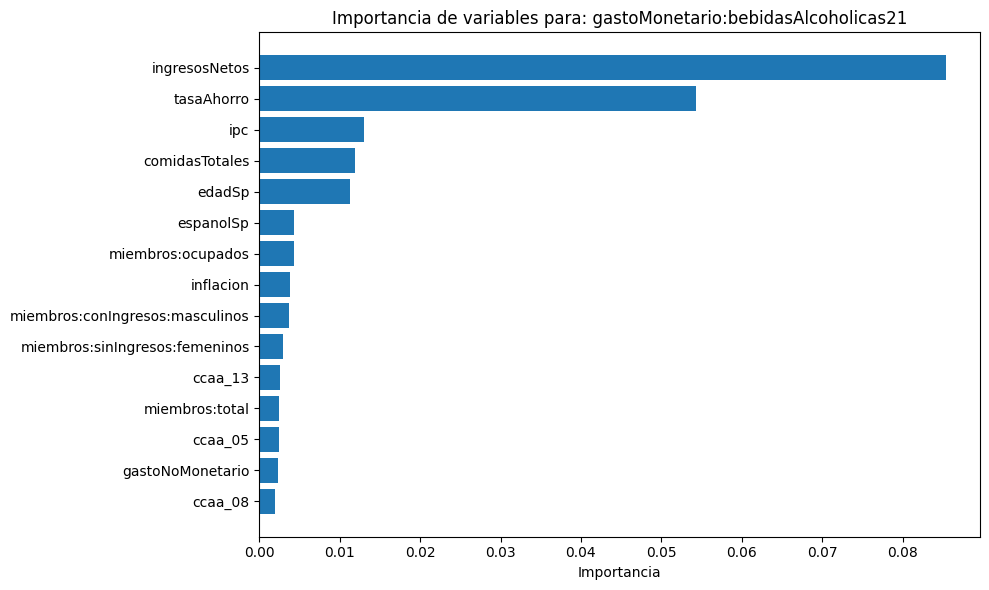

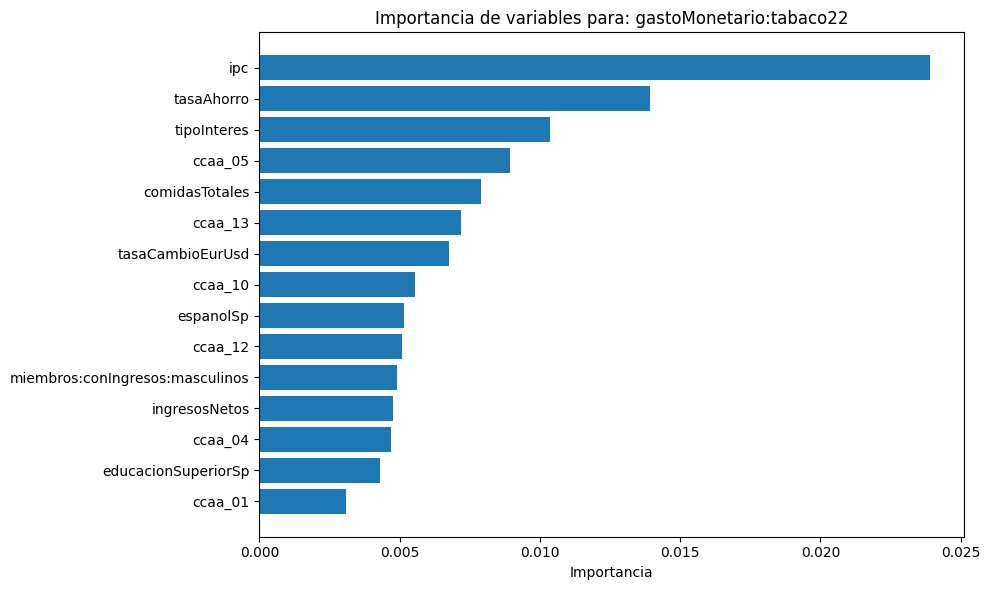

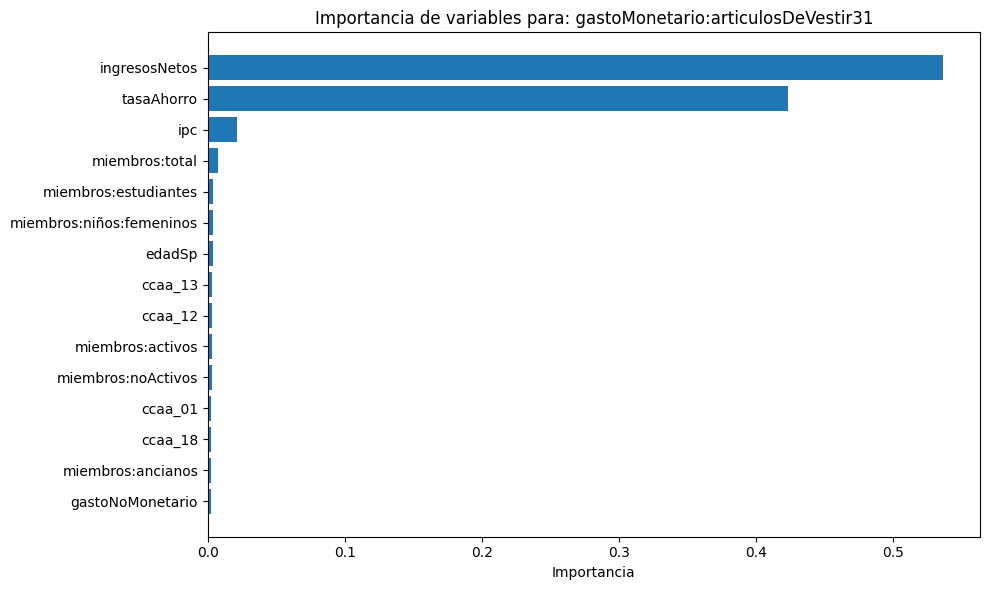

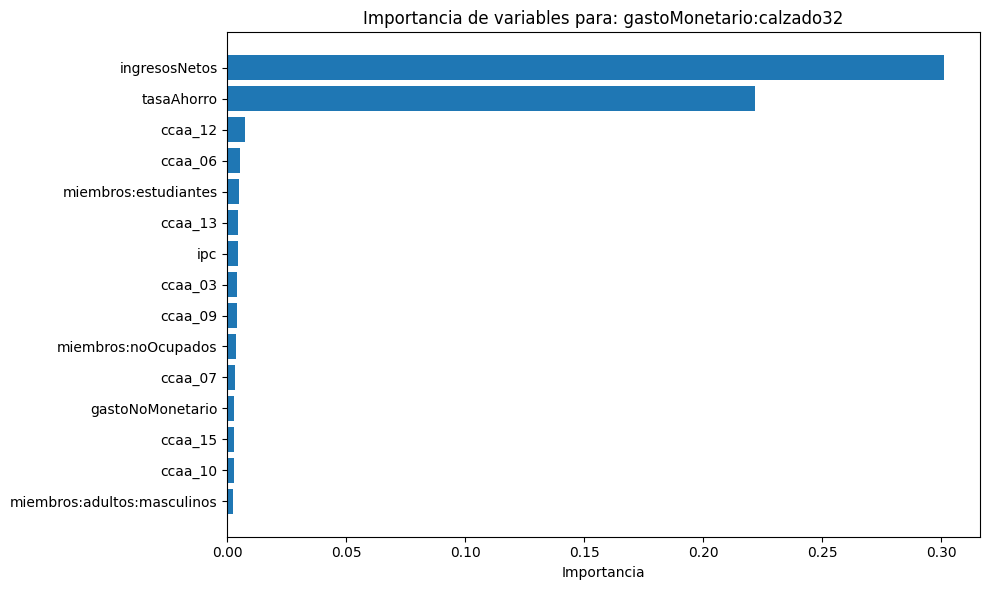

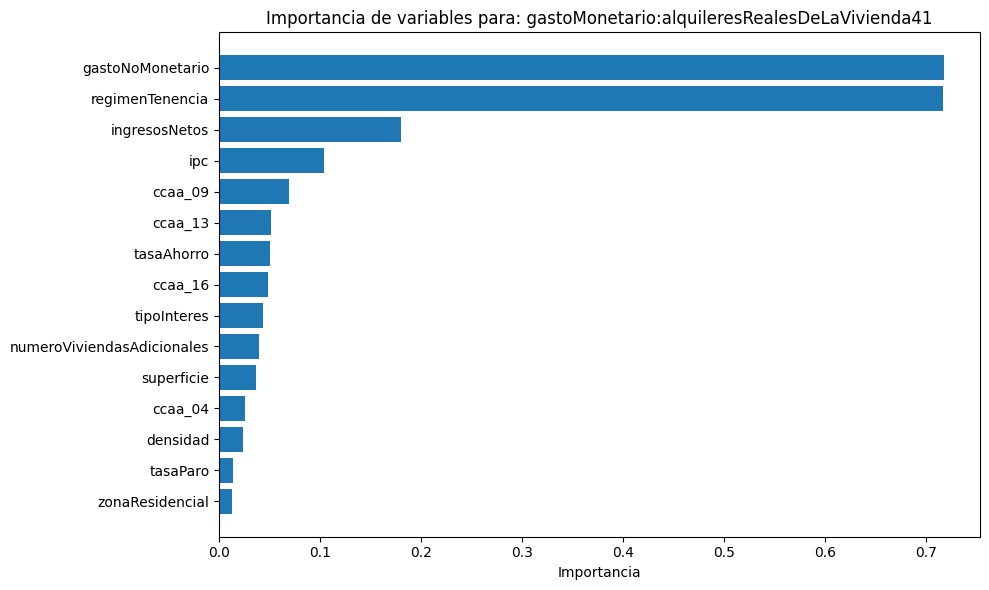

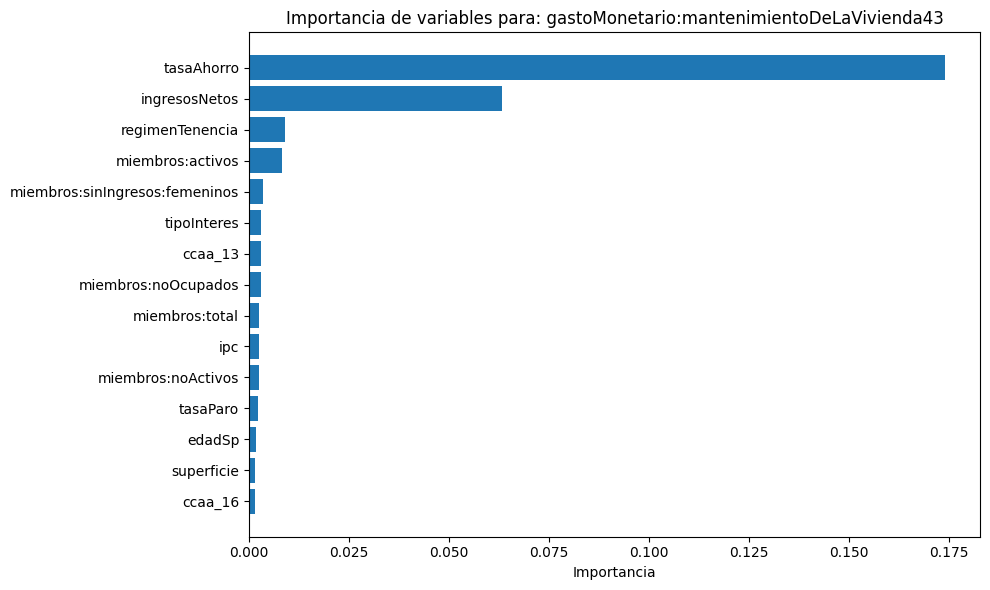

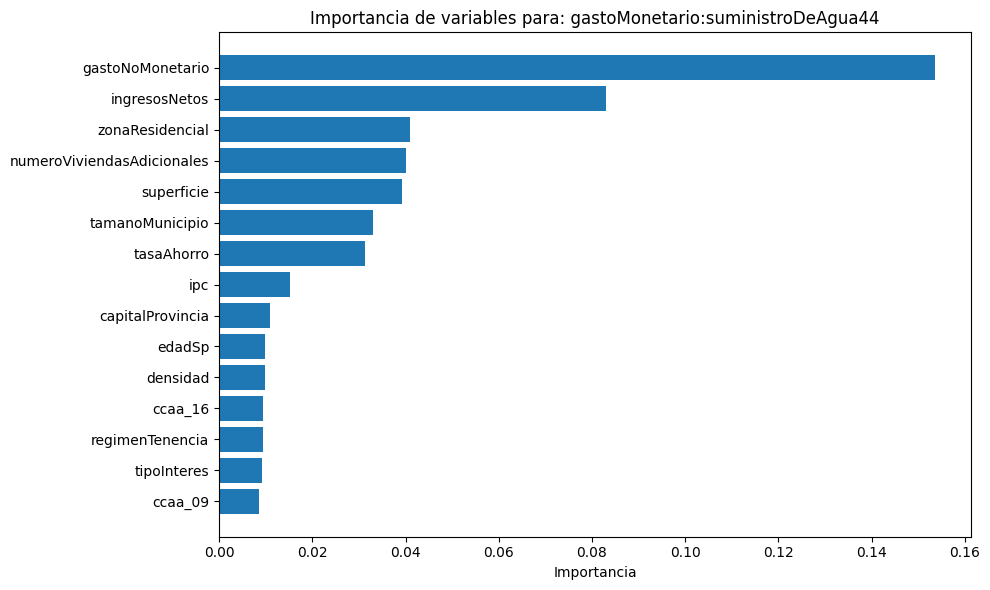

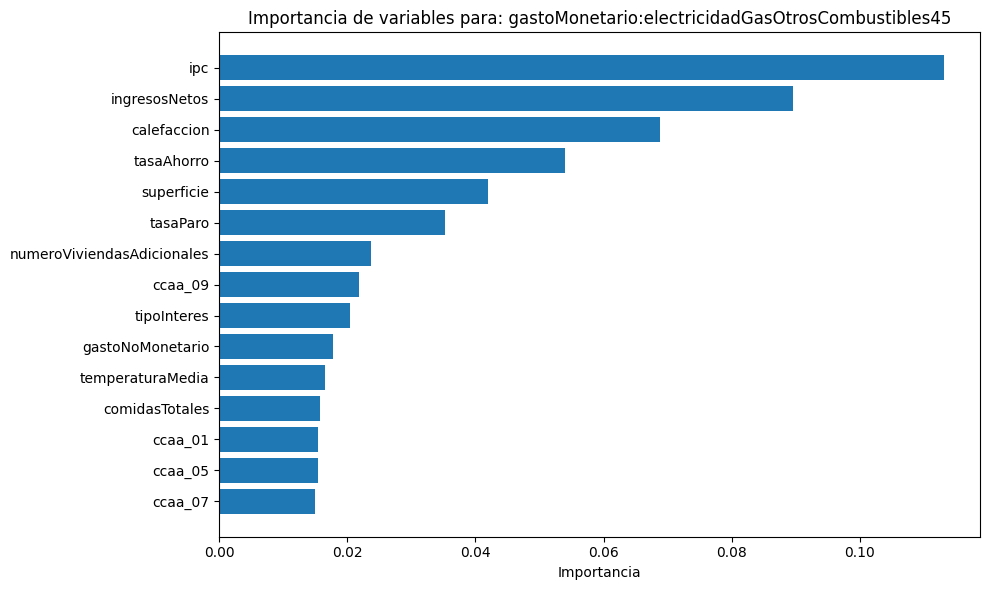

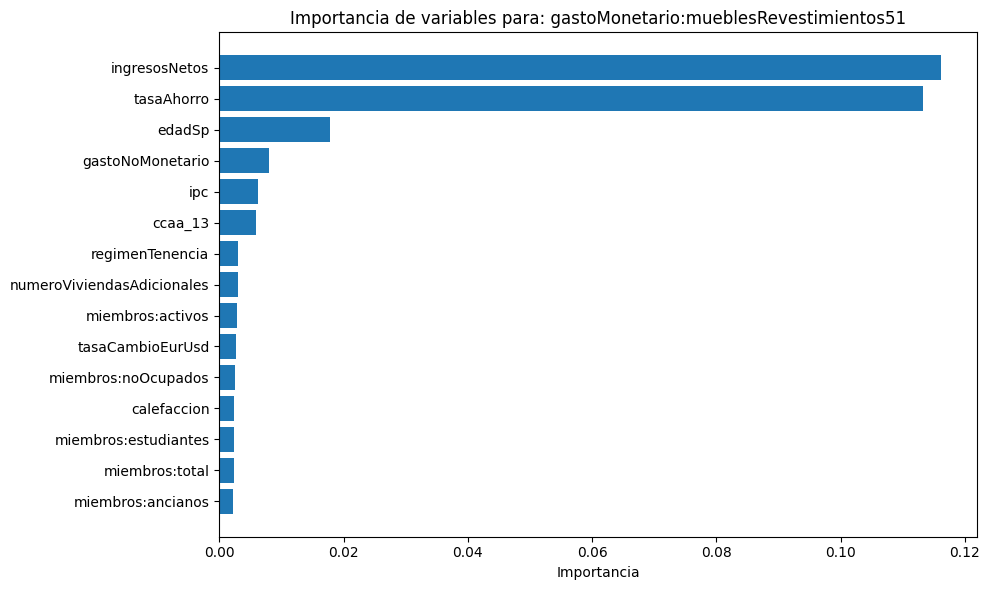

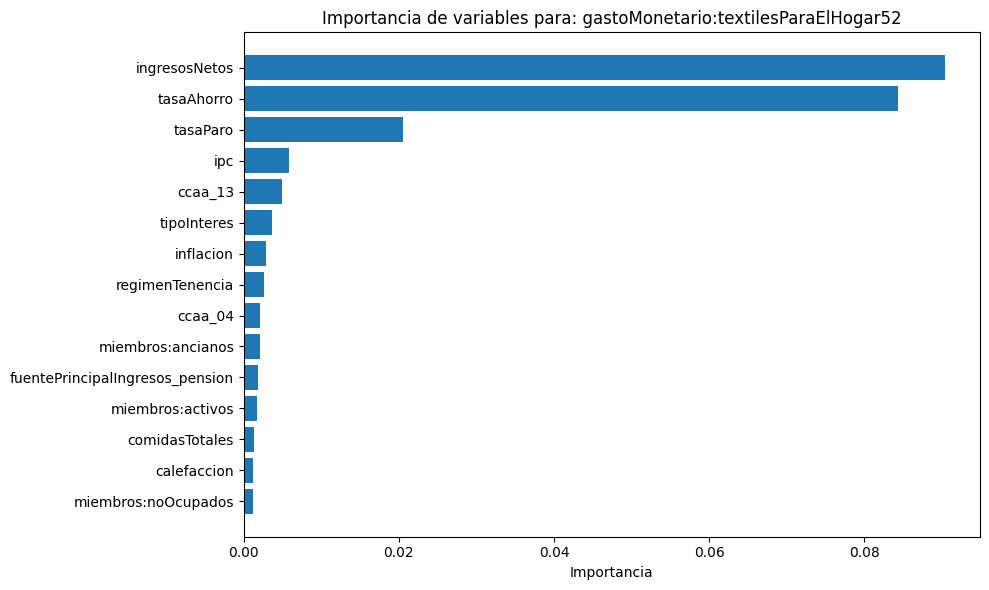

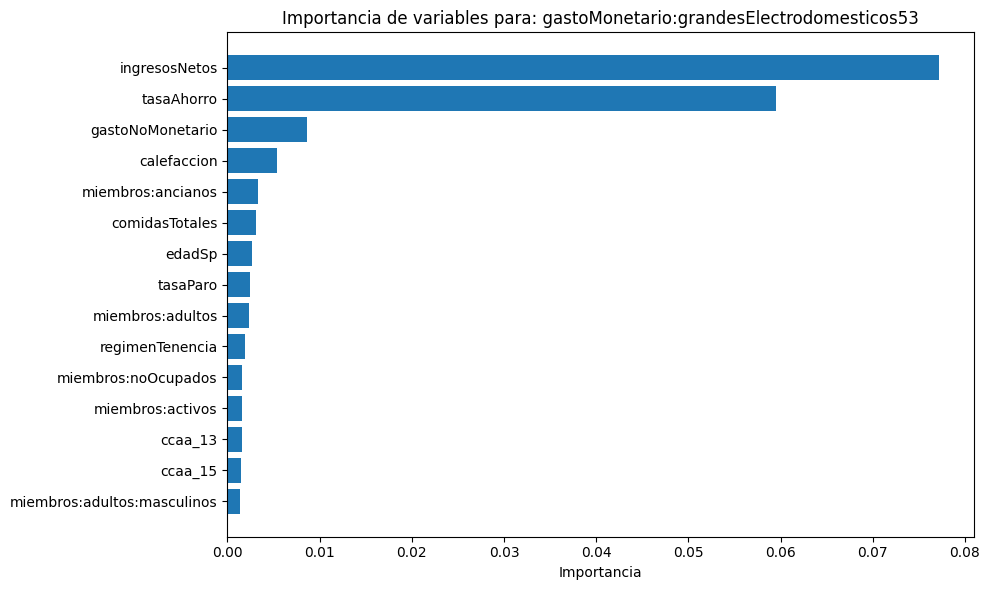

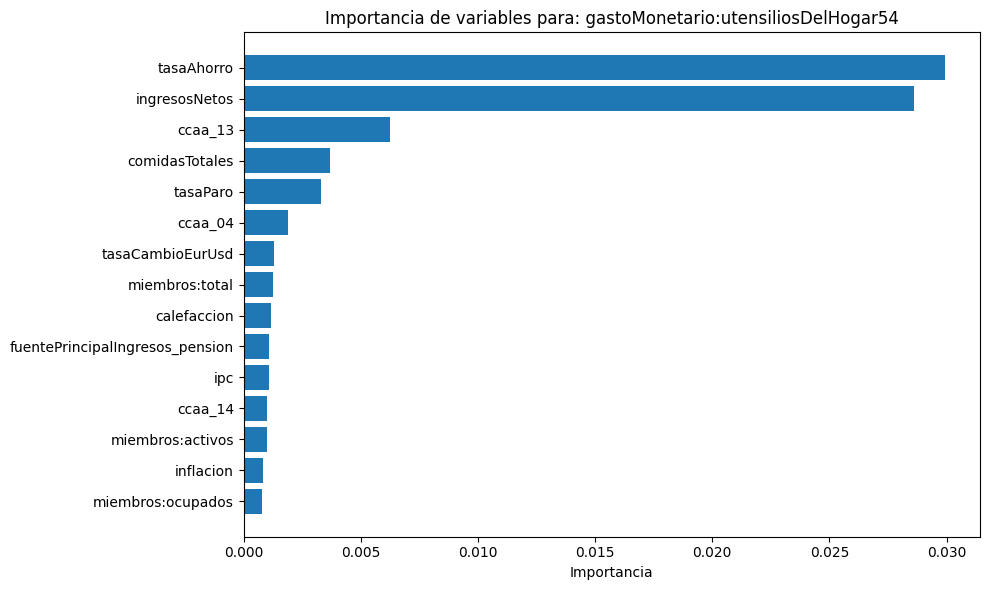

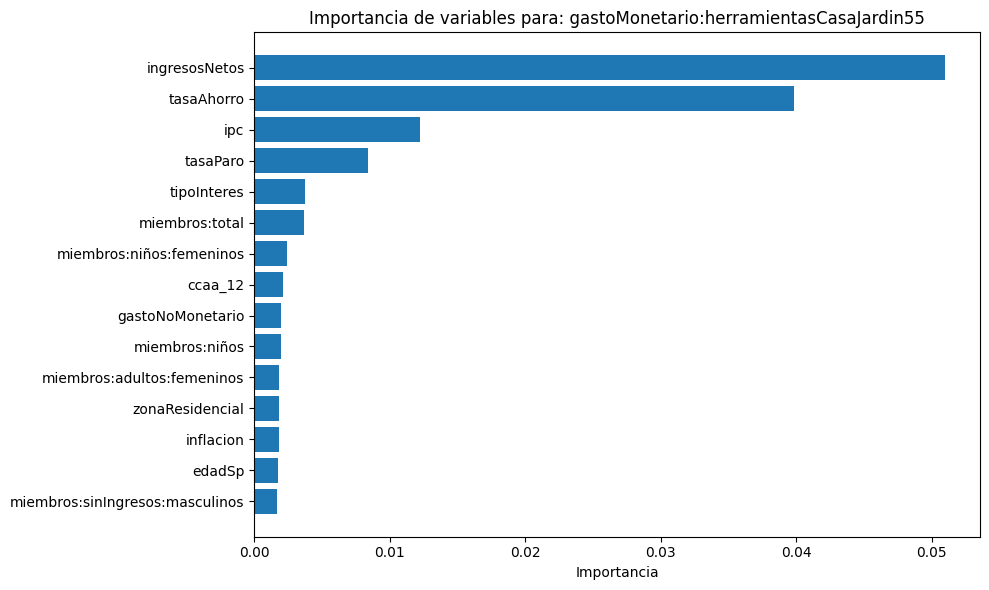

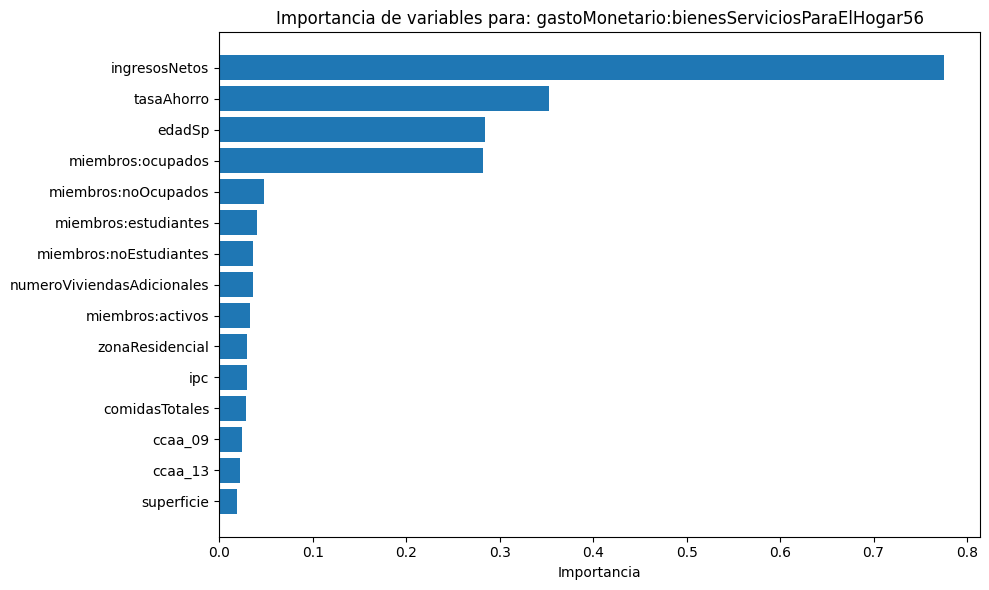

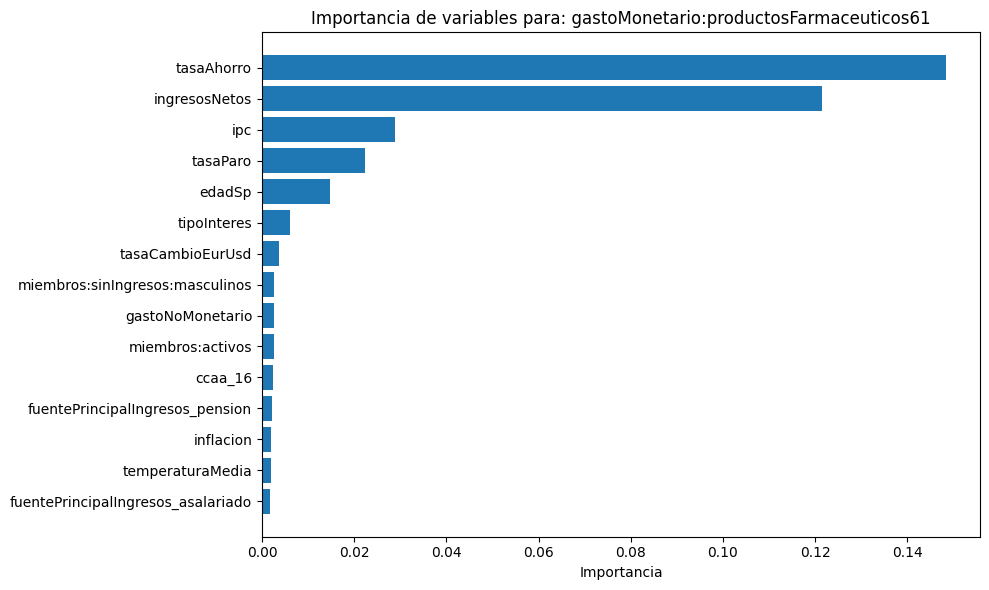

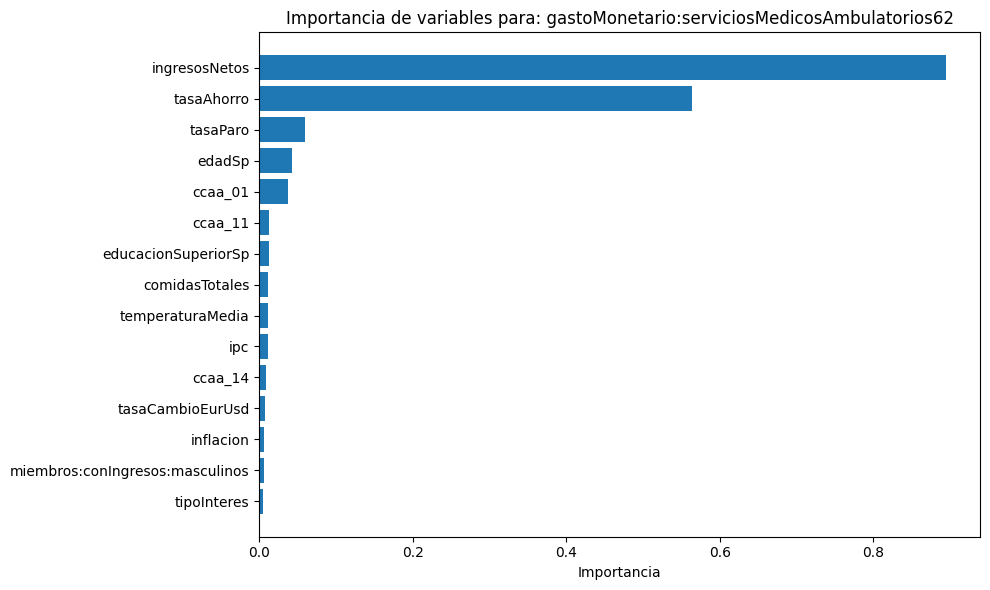

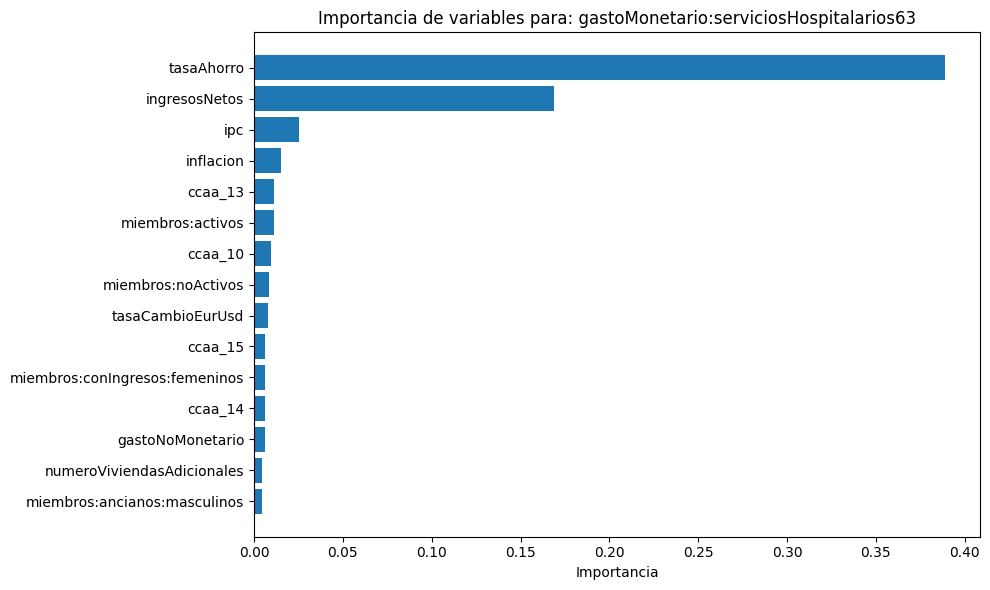

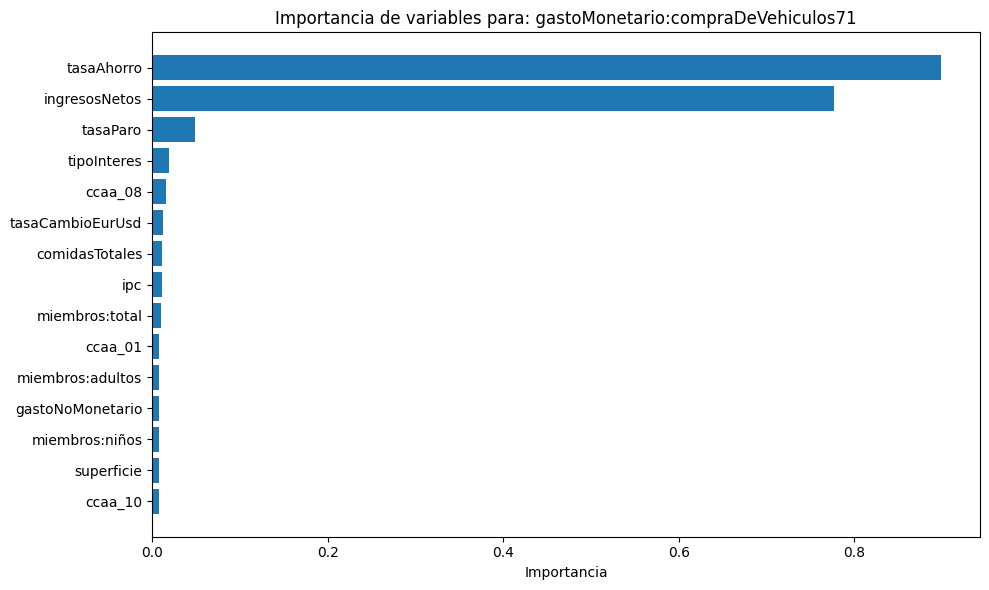

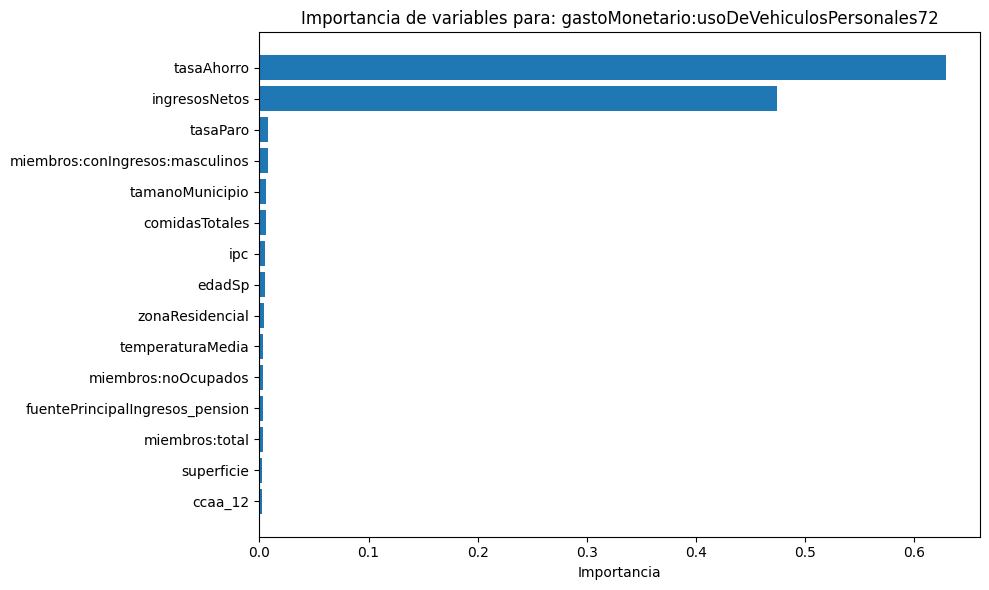

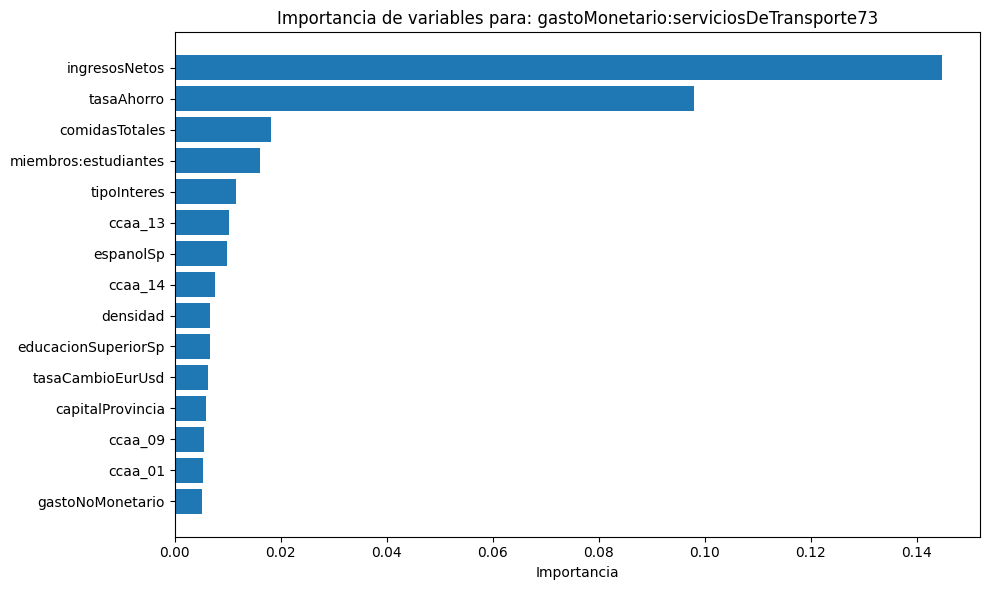

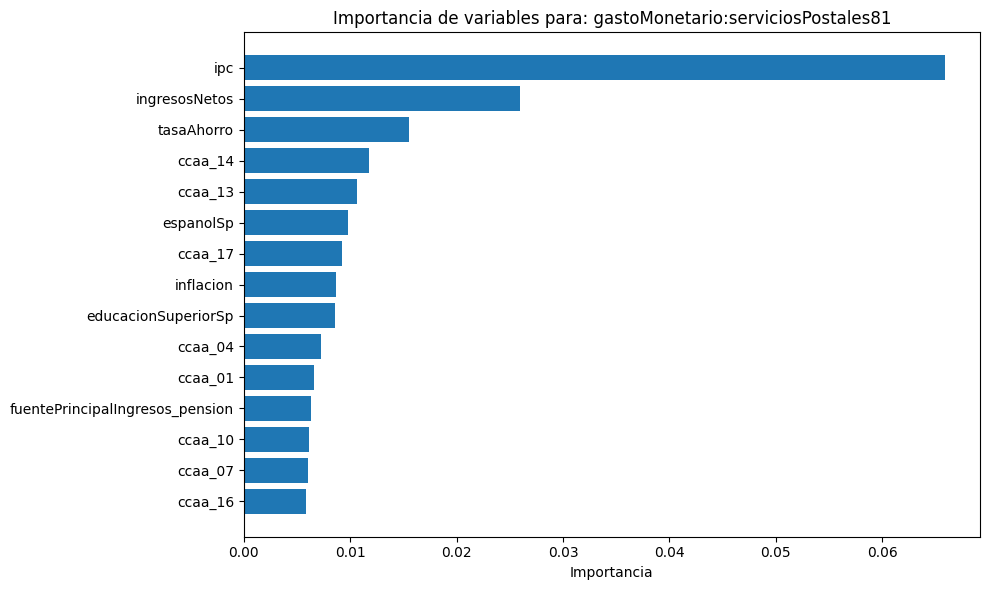

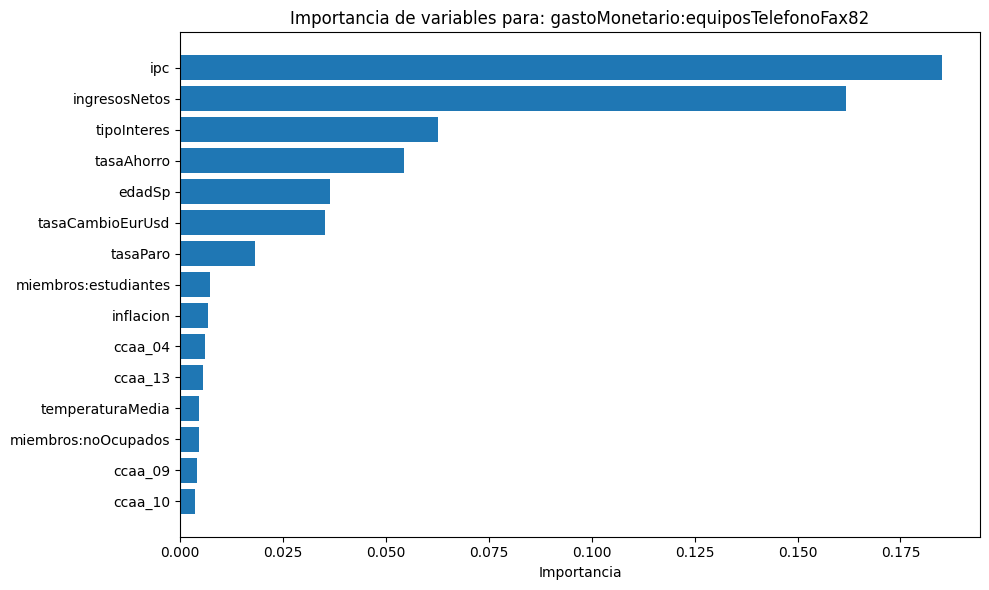

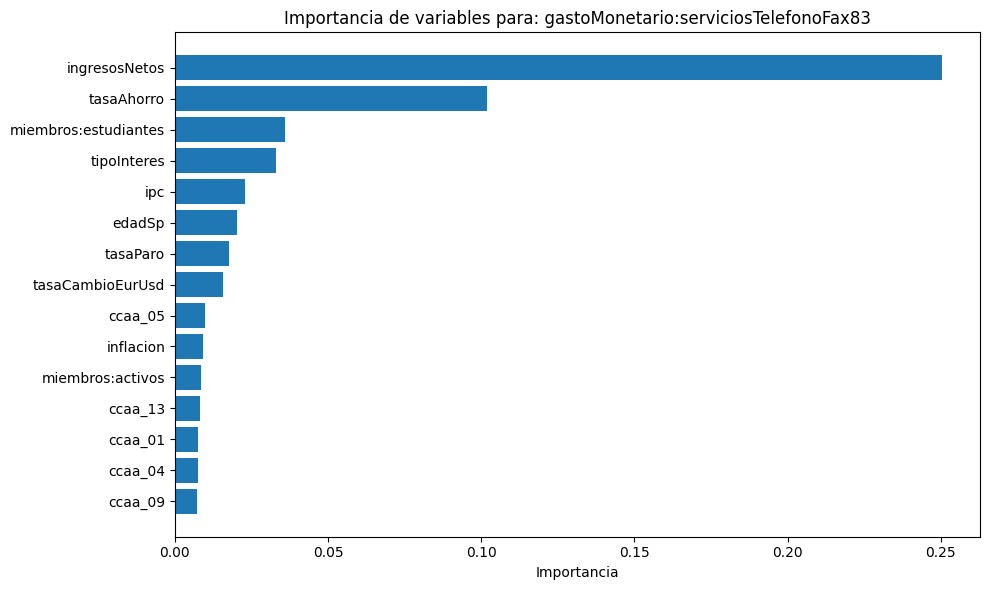

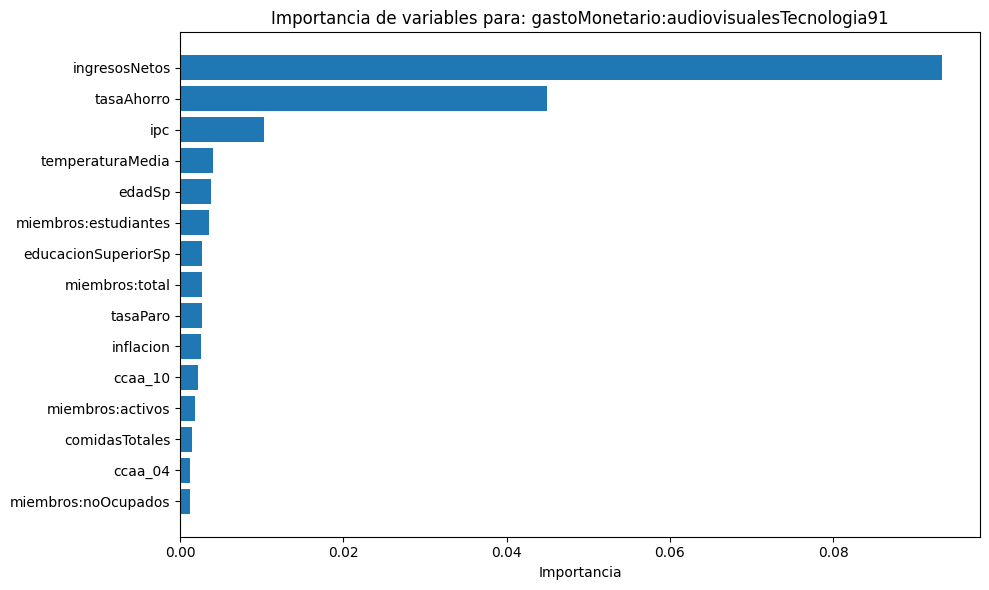

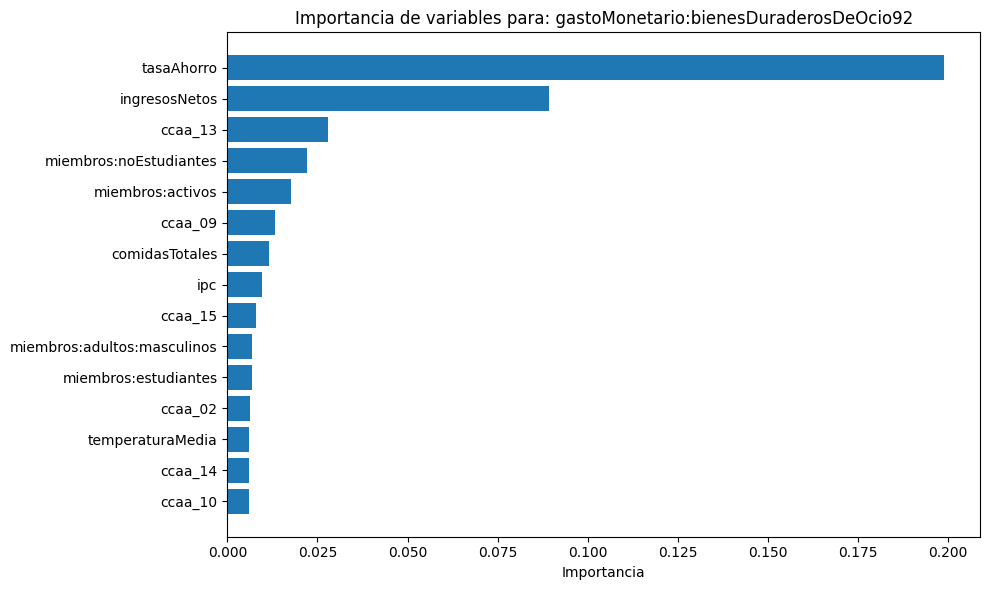

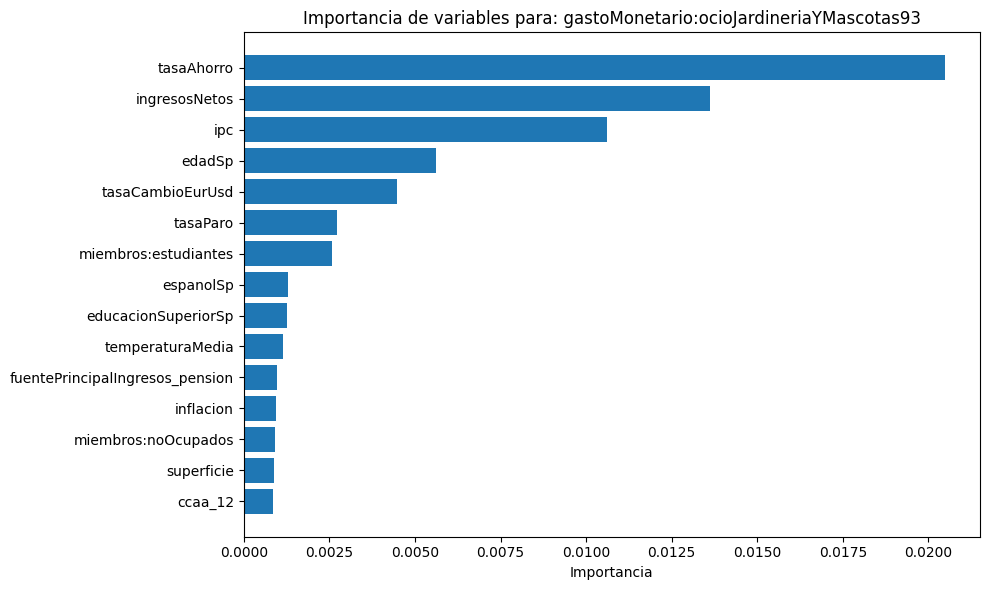

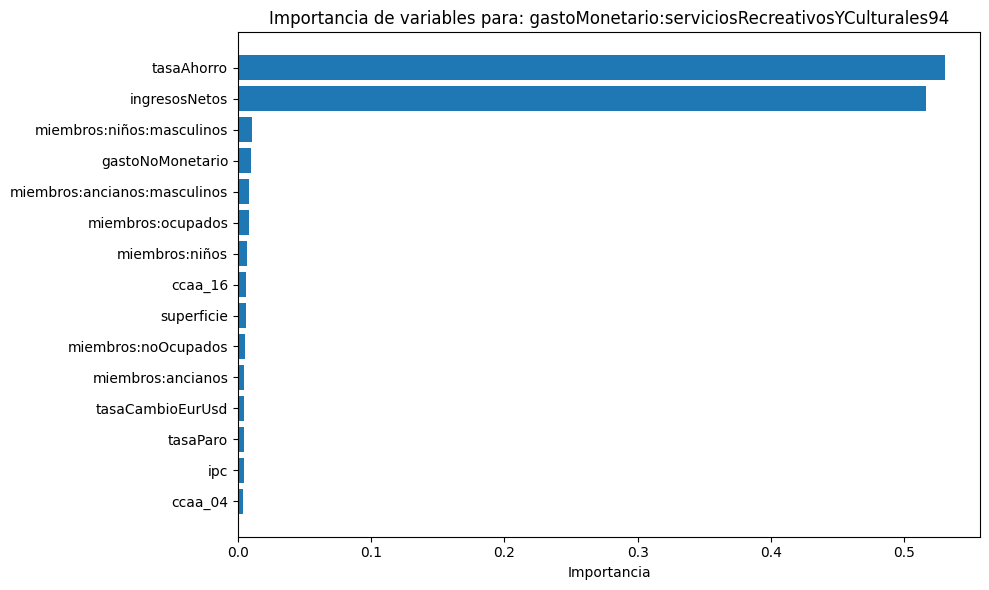

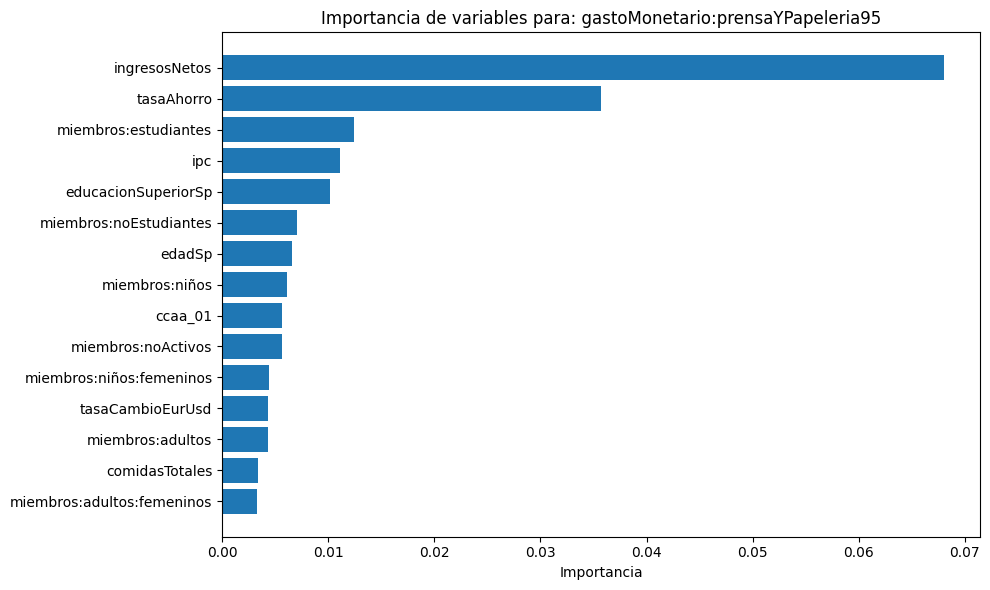

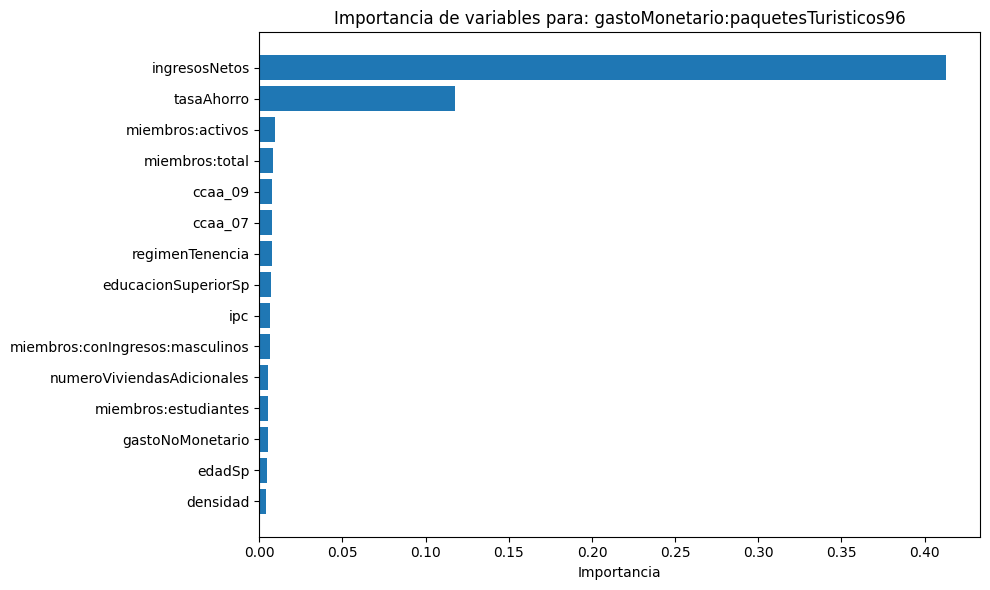

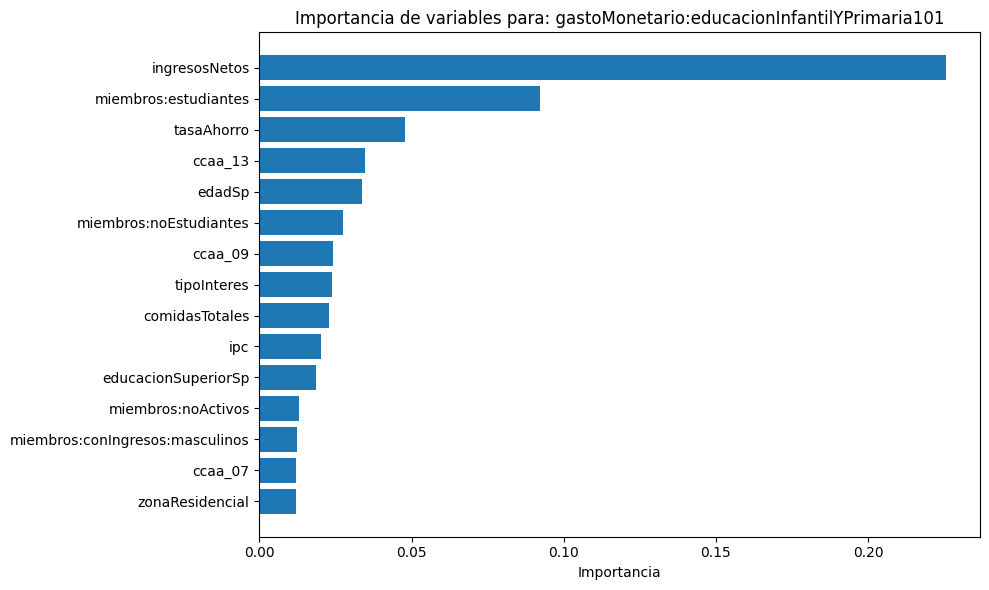

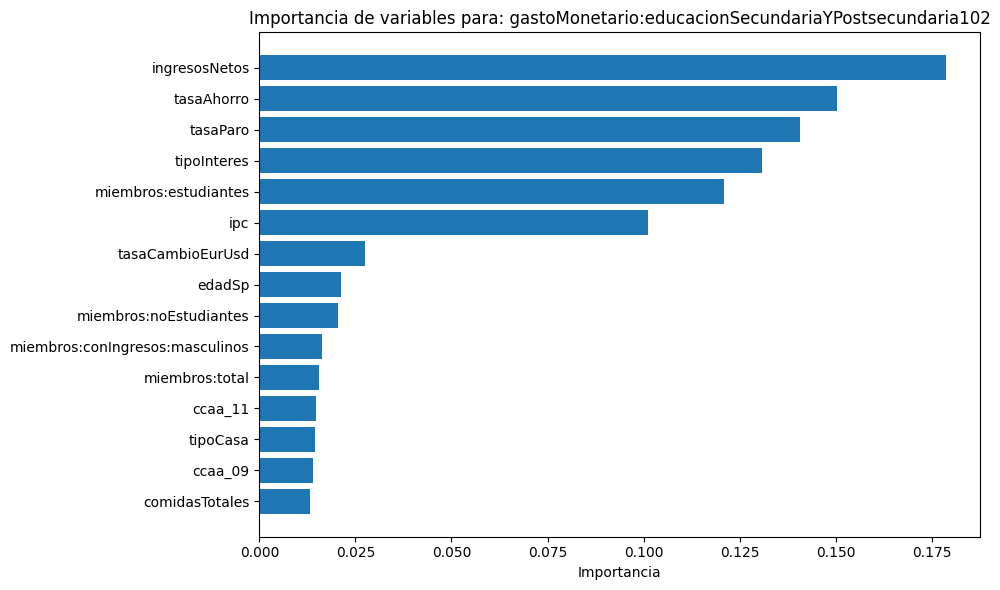

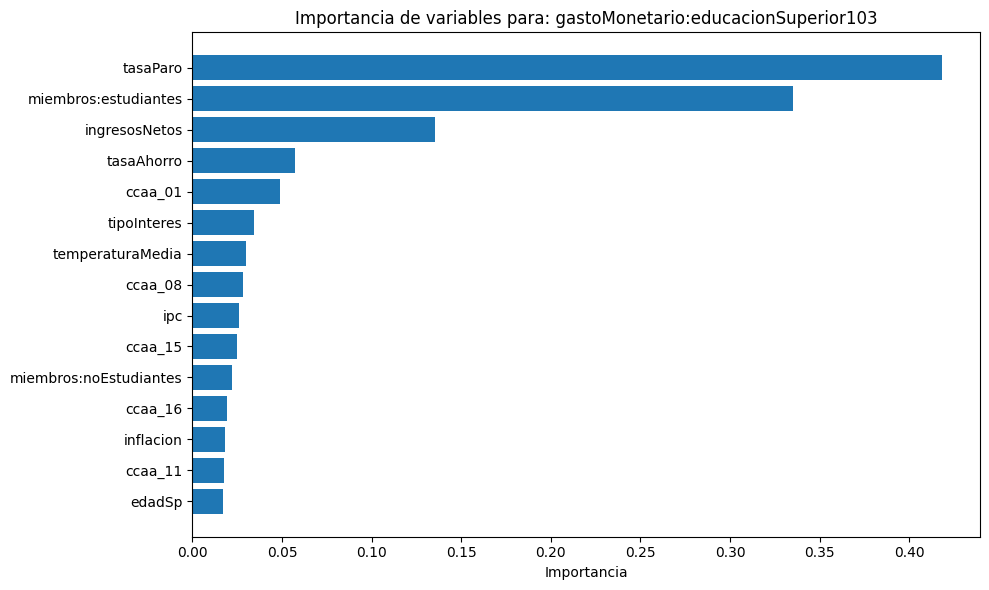

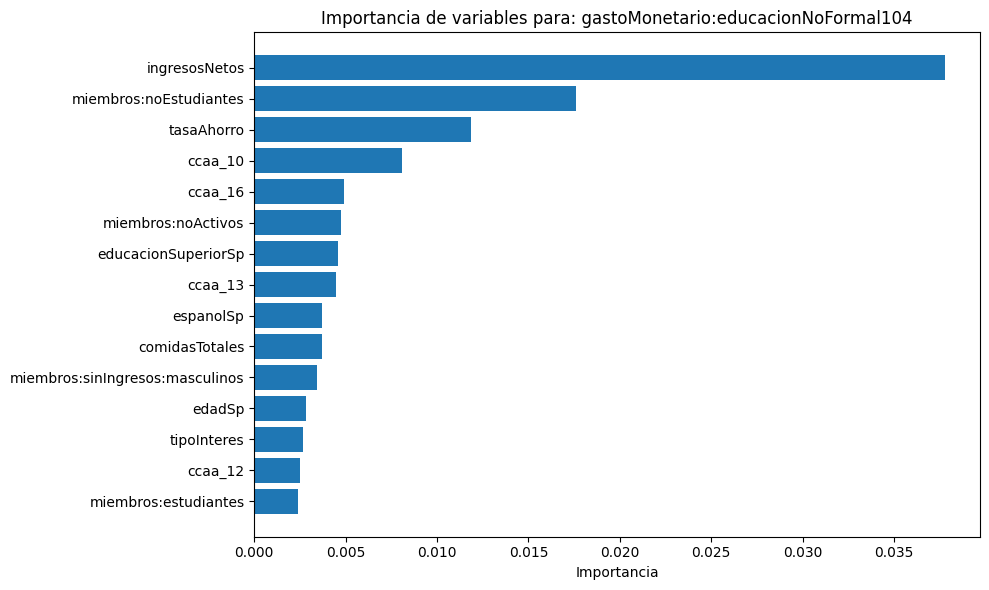

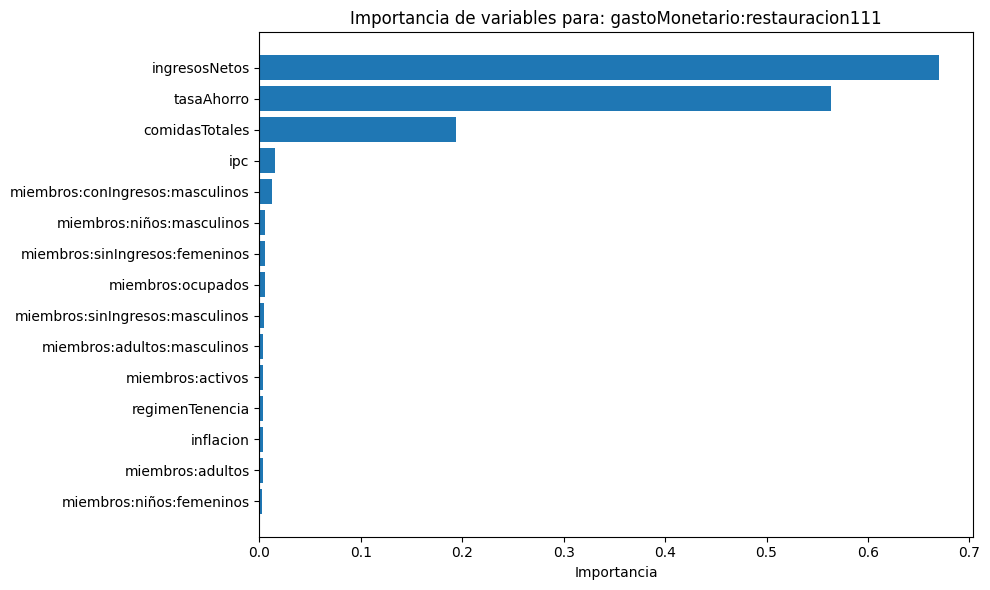

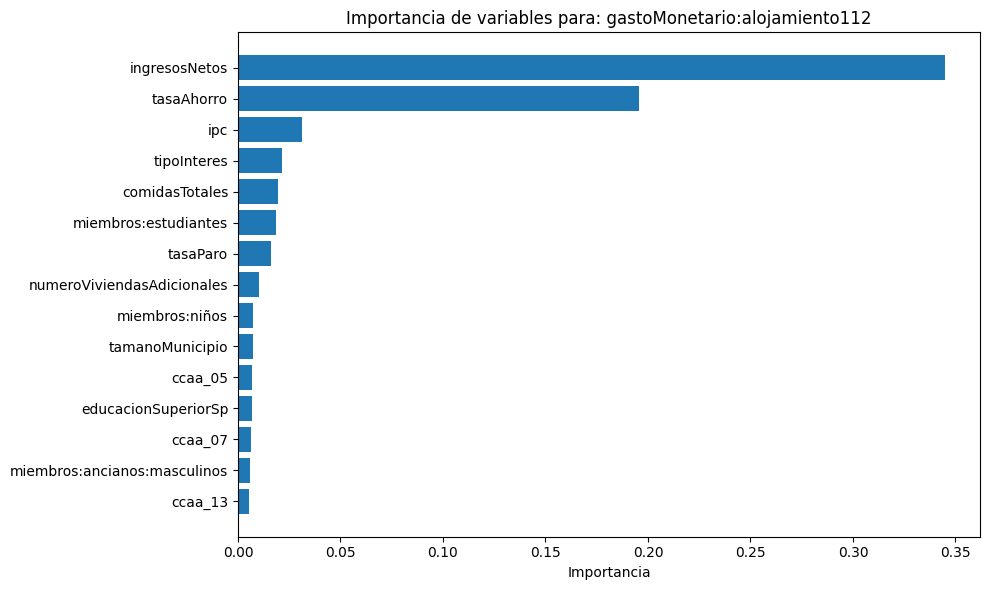

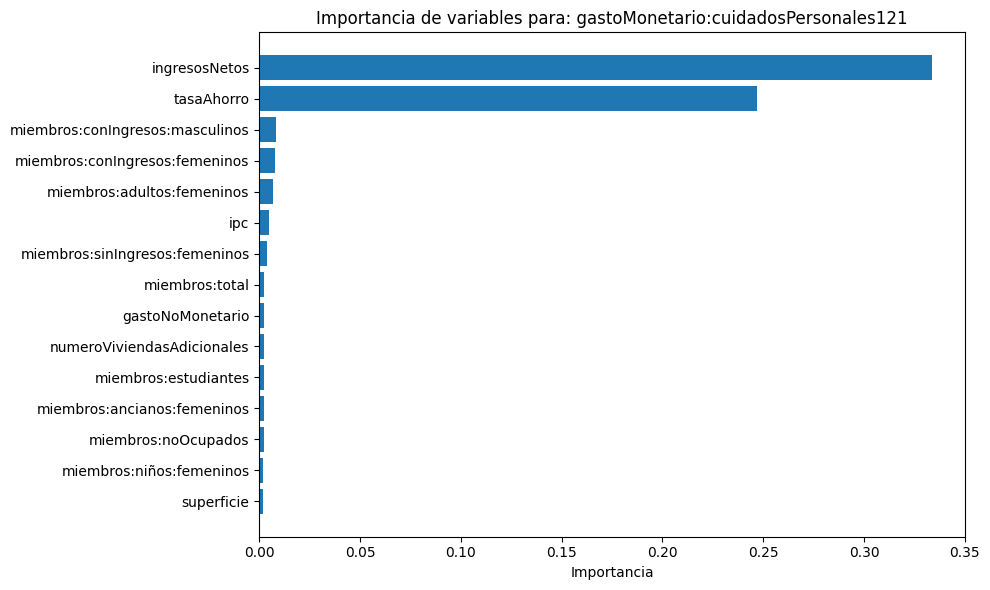

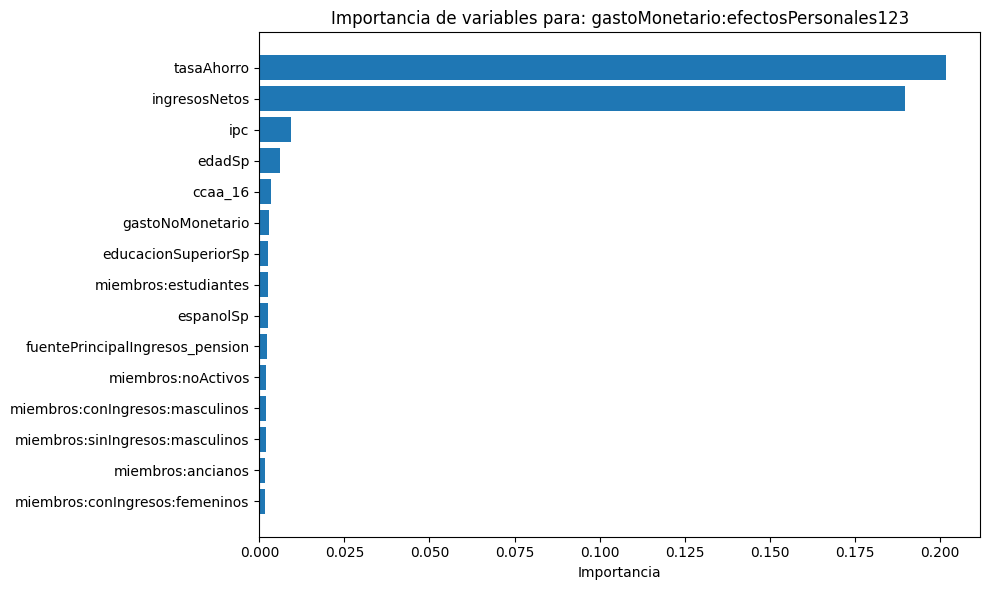

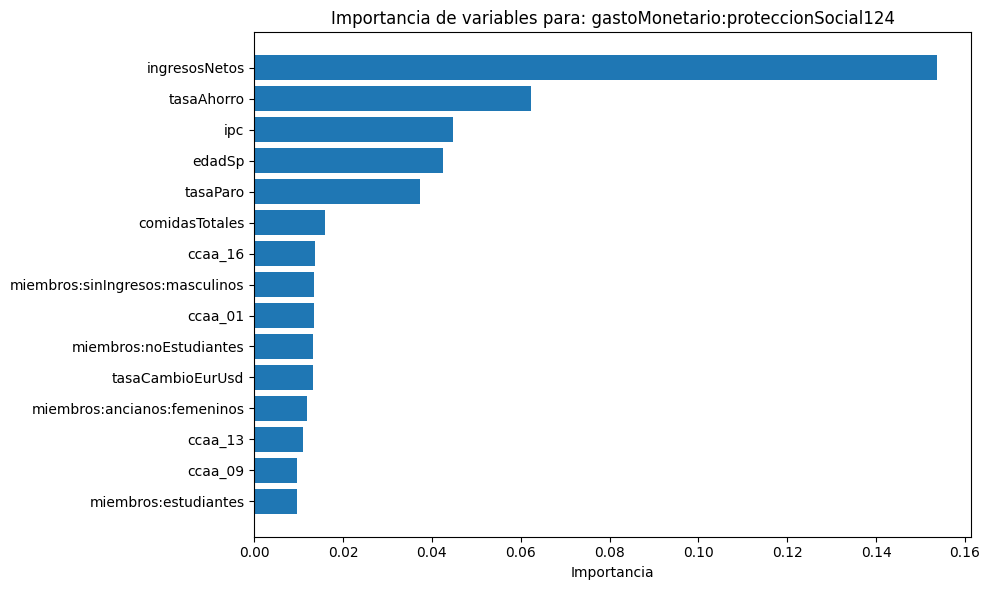

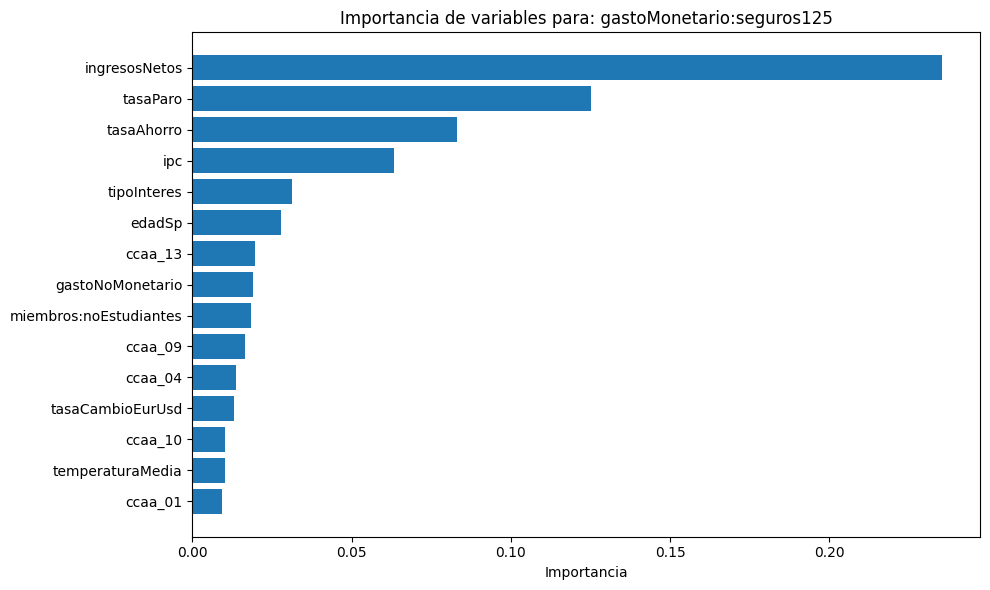

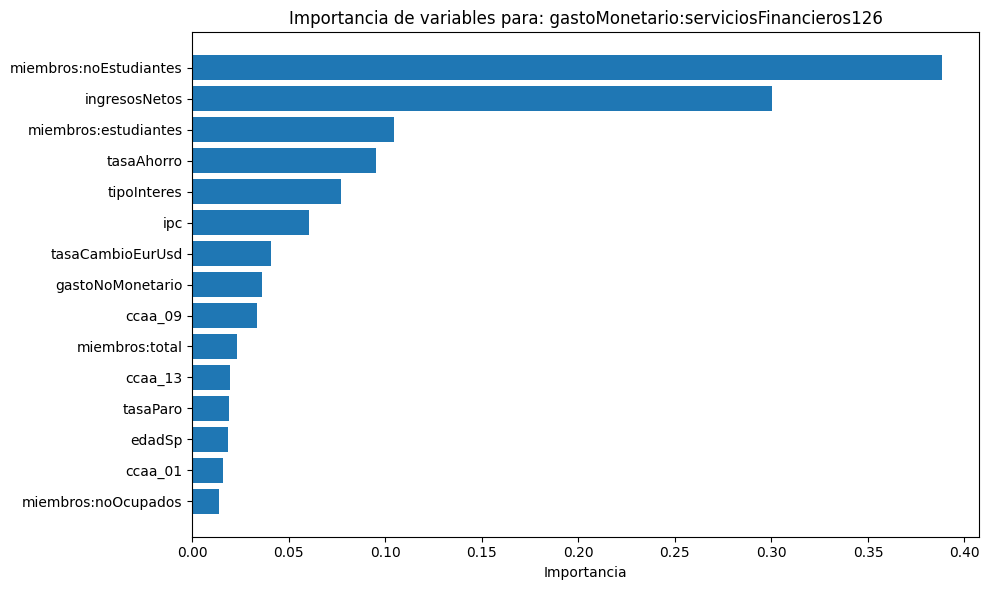

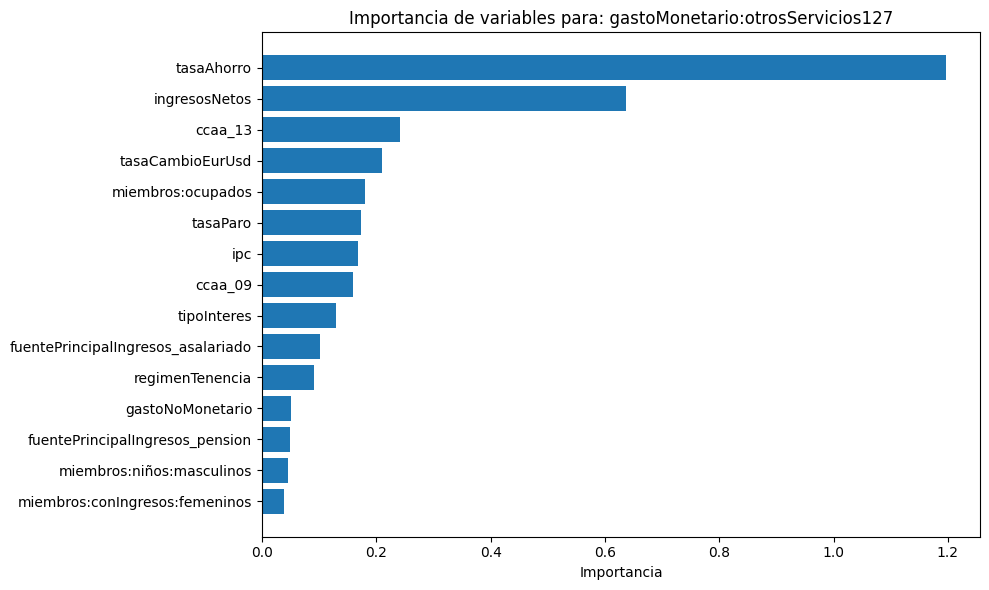

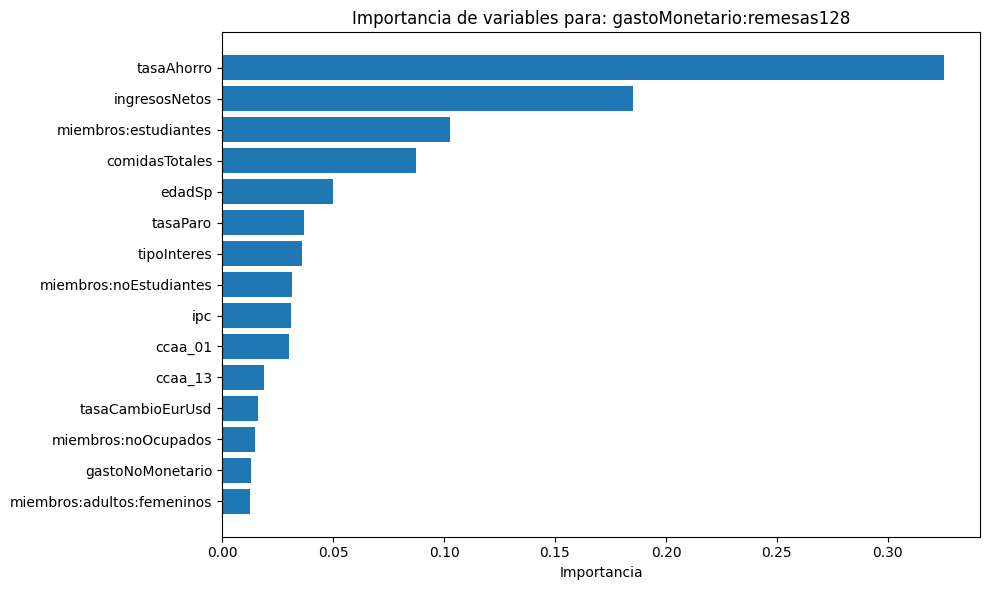

In [15]:
plot_feature_importances_by_target(mlp_importances_df)

In [16]:
# Save the coefficients DataFrame to a TSV file
mlp_importances_df.to_csv("../../datamarts/impotancia_por_categoria_no_lineal.tsv", sep="\t", index=True)

In [17]:
# Save the r2 DataFrame to a CSV file
mlp_r2_df.to_csv("../../datamarts/r2_por_categoria_no_lineal.tsv", sep="\t", index=False)

In [18]:
mlp_importances_df

Variable  Importance                                  Target
0      ingresosNetos    0.454563  gastoMonetario:productosAlimenticios11
1         tasaAhorro    0.382011  gastoMonetario:productosAlimenticios11
2     comidasTotales    0.277613  gastoMonetario:productosAlimenticios11
3                ipc    0.155348  gastoMonetario:productosAlimenticios11
4             edadSp    0.039200  gastoMonetario:productosAlimenticios11
...              ...         ...                                     ...
2855         ccaa_15   -0.002529               gastoMonetario:remesas128
2856         ccaa_03   -0.002572               gastoMonetario:remesas128
2857         ccaa_19   -0.003330               gastoMonetario:remesas128
2858         ccaa_10   -0.004736               gastoMonetario:remesas128
2859    aguaCaliente   -0.004946               gastoMonetario:remesas128

[2860 rows x 3 columns]

In [19]:
# ^Pivotear el DataFrame para que cada target tenga su propia columna de importancias
importances_pivoted = mlp_importances_df.pivot(index='Variable', columns='Target', values='Importance').reset_index()
importances_pivoted

Target          Variable  gastoMonetario:alojamiento112  \
0           aguaCaliente                       0.000192   
1            calefaccion                      -0.000564   
2       capitalProvincia                      -0.000269   
3                ccaa_01                       0.000509   
4                ccaa_02                       0.003586   
..                   ...                            ...   
60              tasaParo                       0.016168   
61      temperaturaMedia                      -0.000021   
62              tipoCasa                       0.001952   
63           tipoInteres                       0.021411   
64       zonaResidencial                       0.001013   

Target  gastoMonetario:alquileresRealesDeLaVivienda41  \
0                                            0.000464   
1                                            0.008051   
2                                            0.010533   
3                                            0.008870   
4                                            0.003887   
..                                                ...   
60                                           0.013399   
61                                           0.007812   
62                                           0.003193   
63                                           0.043632   
64                                           0.012793   

Target  gastoMonetario:articulosDeVestir31  \
0                                -0.000008   
1                                 0.000528   
2                                 0.000487   
3                                 0.002526   
4                                 0.000435   
..                                     ...   
60                                0.000247   
61                                0.001689   
62                                0.000354   
63                                0.001047   
64                                0.000541   

Target  gastoMonetario:audiovisualesTecnologia91  \
0                                       0.000009   
1                                       0.001015   
2                                      -0.000024   
3                                       0.000546   
4                                       0.000328   
..                                           ...   
60                                      0.002611   
61                                      0.004043   
62                                      0.000322   
63                                      0.000520   
64                                      0.000281   

Target  gastoMonetario:bebidasAlcoholicas21  \
0                                  0.000102   
1                                  0.000322   
2                                  0.000625   
3                                  0.000349   
4                                  0.000042   
..                                      ...   
60                                 0.001720   
61                                 0.000259   
62                                 0.000499   
63                                 0.000686   
64                                 0.000540   

Target  gastoMonetario:bebidasNoAlcoholicas12  \
0                                    0.000084   
1                                    0.000296   
2                                    0.003599   
3                                    0.000734   
4                                    0.000795   
..                                        ...   
60                                   0.000199   
61                                   0.006748   
62                                   0.000216   
63                                   0.001666   
64                                   0.000284   

Target  gastoMonetario:bienesDuraderosDeOcio92  \
0                                     0.002506   
1                                     0.002928   
2                                    -0.000142   
3                                     0.000661   
4                       

### Mapa de calor de los coeficientes por código

In [20]:
import seaborn as sns

In [21]:
import re

def renombrar_columnas_por_codigo(df, ignore_cols=None):
    """
    Renombra las columnas extrayendo el código numérico de su final
    (p. ej. de 'gastoMonetario:alojamiento112' deja '112', etc.),
    pero omite renombrar cualquier columna cuyo nombre esté en ignore_cols.
    
    Parámetros:
    - df: DataFrame de pandas.
    - ignore_cols: lista de nombres de columnas a excluir (por defecto ['variable']).
    """
    if ignore_cols is None:
        ignore_cols = ['Variable']
        
    patron = re.compile(r'(\d+)$')  

    mapping = {}
    
    for col in df.columns:
        if col in ignore_cols:
            continue
        m = patron.search(col)
        if m:
            mapping[col] = m.group(1)
    
    return df.rename(columns=mapping)


In [22]:
importances_pivoted

Target          Variable  gastoMonetario:alojamiento112  \
0           aguaCaliente                       0.000192   
1            calefaccion                      -0.000564   
2       capitalProvincia                      -0.000269   
3                ccaa_01                       0.000509   
4                ccaa_02                       0.003586   
..                   ...                            ...   
60              tasaParo                       0.016168   
61      temperaturaMedia                      -0.000021   
62              tipoCasa                       0.001952   
63           tipoInteres                       0.021411   
64       zonaResidencial                       0.001013   

Target  gastoMonetario:alquileresRealesDeLaVivienda41  \
0                                            0.000464   
1                                            0.008051   
2                                            0.010533   
3                                            0.008870   
4                                            0.003887   
..                                                ...   
60                                           0.013399   
61                                           0.007812   
62                                           0.003193   
63                                           0.043632   
64                                           0.012793   

Target  gastoMonetario:articulosDeVestir31  \
0                                -0.000008   
1                                 0.000528   
2                                 0.000487   
3                                 0.002526   
4                                 0.000435   
..                                     ...   
60                                0.000247   
61                                0.001689   
62                                0.000354   
63                                0.001047   
64                                0.000541   

Target  gastoMonetario:audiovisualesTecnologia91  \
0                                       0.000009   
1                                       0.001015   
2                                      -0.000024   
3                                       0.000546   
4                                       0.000328   
..                                           ...   
60                                      0.002611   
61                                      0.004043   
62                                      0.000322   
63                                      0.000520   
64                                      0.000281   

Target  gastoMonetario:bebidasAlcoholicas21  \
0                                  0.000102   
1                                  0.000322   
2                                  0.000625   
3                                  0.000349   
4                                  0.000042   
..                                      ...   
60                                 0.001720   
61                                 0.000259   
62                                 0.000499   
63                                 0.000686   
64                                 0.000540   

Target  gastoMonetario:bebidasNoAlcoholicas12  \
0                                    0.000084   
1                                    0.000296   
2                                    0.003599   
3                                    0.000734   
4                                    0.000795   
..                                        ...   
60                                   0.000199   
61                                   0.006748   
62                                   0.000216   
63                                   0.001666   
64                                   0.000284   

Target  gastoMonetario:bienesDuraderosDeOcio92  \
0                                     0.002506   
1                                     0.002928   
2                                    -0.000142   
3                                     0.000661   
4                       

In [23]:
def generar_mapa_calor_importancias(df, figsize=(22, 14), vmax=0.05, output_path=None):
    """
    Genera un mapa de calor con las columnas (códigos de gasto) ordenadas numéricamente.
    
    Args:
        df (pd.DataFrame): DataFrame con variables como filas y categorías como columnas.
        figsize (tuple): Tamaño de la figura.
        vmax (float): Valor máximo para la escala de color.
        output_path (str): Ruta opcional para guardar el mapa.
    """
    df_codificado = renombrar_columnas_por_codigo(df.copy())
    data = df_codificado.drop(columns=["Target", "Variable"], errors="ignore")
    data.index = df_codificado["Variable"] if "Variable" in df_codificado.columns else df_codificado.index

    # Reordenar columnas por valor numérico del código
    columnas_ordenadas = sorted(data.columns, key=lambda x: float(x.replace("_", ".")))
    data = data[columnas_ordenadas]

    plt.figure(figsize=figsize)
    ax = sns.heatmap(
        data,
        cmap="Reds",
        annot=True,
        fmt=".2f",
        linewidths=0.5,
        linecolor="gray",
        vmin=0,
        vmax=vmax,
        cbar_kws={"label": "Importancia relativa"}
    )

    plt.title("Mapa de calor de importancias por variable y categoría de gasto", fontsize=14)
    plt.xlabel("Código de Categoría de Gasto")
    plt.ylabel("Variable")
    plt.tight_layout()

    if output_path:
        plt.savefig(output_path, dpi=300)
    plt.show()

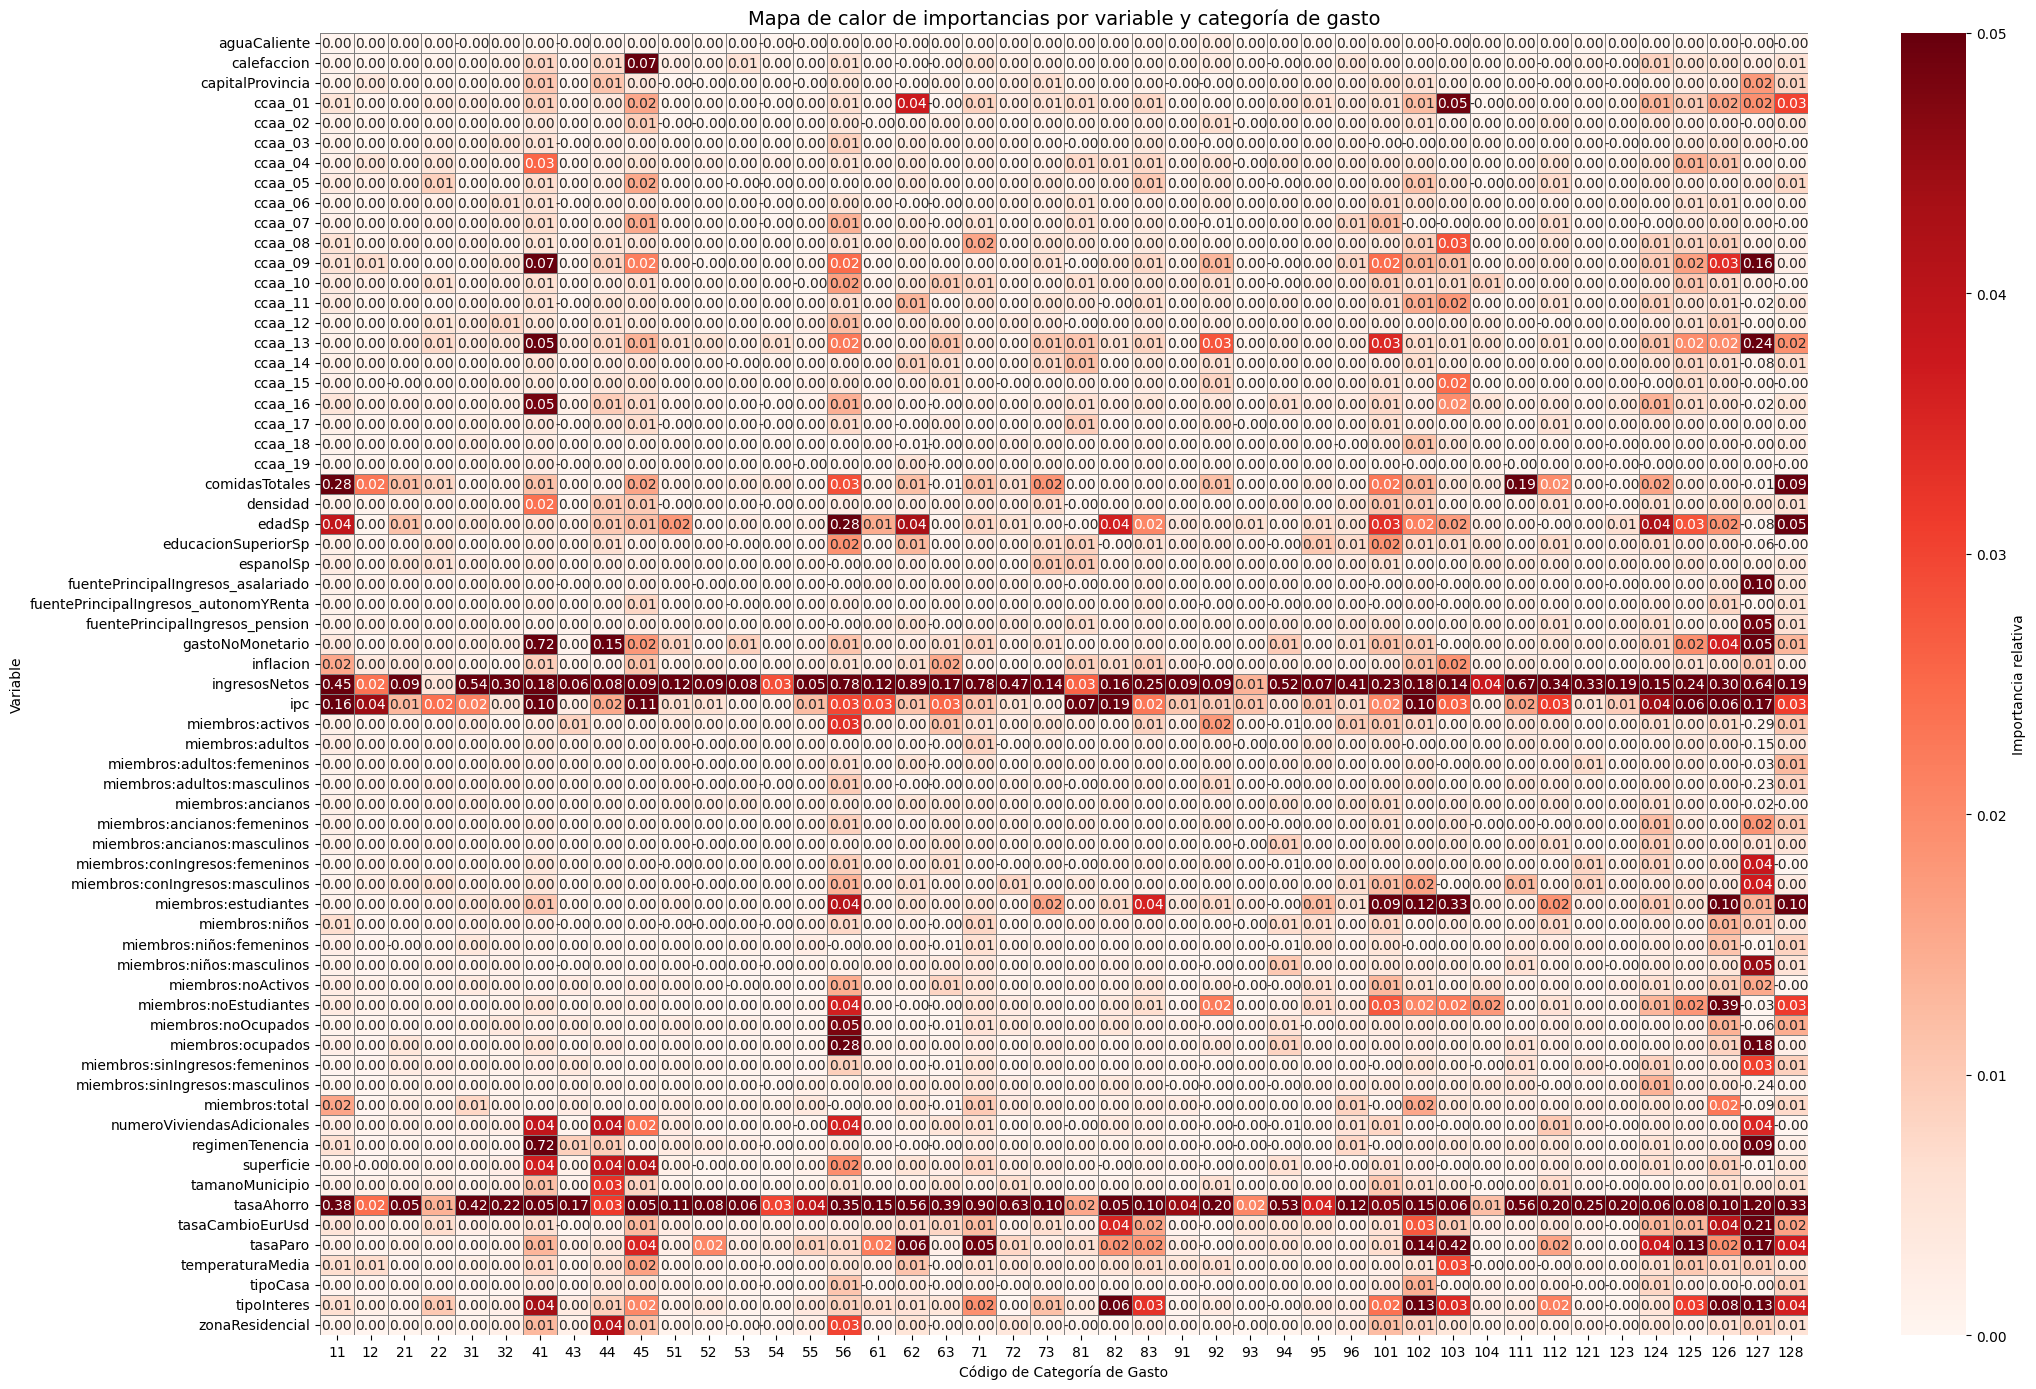

In [24]:
generar_mapa_calor_importancias(importances_pivoted)